# Cardiovascular Prediction using Logistic Regression

This project is written in Python 3.11.7

Project completed on 2024-07 by Virginia Arnette

# Introduction

Coronary heart disease (CHD) is the leading cause of death in the US, responsible for about 610,000 deaths annually, which is one in four deaths. Globally, it ranks as the third leading cause of death, accounting for 17.8 million deaths each year. The healthcare costs for treating CAD in the US exceed $200 billion annually, though it is largely preventable.


Given the significant healthcare burden of CHD, identifying modifiable and non-modifiable risk factors has helped reduce mortality rates over the past forty years. Advances in medical technology and risk factor identification have significantly decreased CAD deaths. This highlights the importance of developing models to predict CHD risk, as they can further reduce the economic and disease burden by enabling early intervention.

Reference: 

Brown JC, Gerhardt TE, Kwon E. Risk Factors for Coronary Artery Disease. 2023 Jan 23. In: StatPearls [Internet]. Treasure Island (FL): StatPearls Publishing; 2024 Jan–. PMID: 32119297. https://pubmed.ncbi.nlm.nih.gov/32119297/

# Aim:  Given basic health parameters, predict the presence of 10-year risk of coronary heart disease (CHD) using a logistic regression model.

# Dataset Description:

## Demographic:
- **Sex**: male or female ("M" or "F")
- **Age**: Age of the patient; (Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

## Behavioral:
- **is_smoking**: whether or not the patient is a current smoker ("YES" or "NO")
- **Cigs Per Day**: the number of cigarettes that the person smoked on average in one day. (can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

## Medical (History):
- **BP Meds**: whether or not the patient was on blood pressure medication (Nominal)
- **Prevalent Stroke**: whether or not the patient had previously had a stroke (Nominal)
- **Prevalent Hyp**: whether or not the patient was hypertensive (Nominal)
- **Diabetes**: whether or not the patient had diabetes (Nominal)

## Medical (Current):
- **Tot Chol**: total cholesterol level (Continuous)
- **Sys BP**: systolic blood pressure (Continuous)
- **Dia BP**: diastolic blood pressure (Continuous)
- **BMI**: Body Mass Index (Continuous)
- **Heart Rate**: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of the large number of possible values.)
- **Glucose**: glucose level (Continuous)

## Predict variable (desired target):
- **10 year risk of coronary heart disease (CHD)**: (binary: “1” means “Yes”, “0” means “No”)


Source: https://www.kaggle.com/datasets/christofel04/cardiovascular-study-dataset-predict-heart-disea/data

# Project Outline

## Contents:

### 0. Initialization
- **0.1 Load Data**
- **0.2 Initial Checks**
  - Data types
  - Basic statistics

### 1. Data Cleaning
- **1.1 Handling Missing Values**
- **1.2 Correcting Data Types and Formatting**
- **1.3 Investigating for Outliers**

### 2. Exploratory Data Analysis

### 3. Data Preparation: Adding Constant, Feature Selection, Splitting, and Scaling

### 4. Model Training and Evaluation

### 5. Conclusion

# 0 Initialization

In [210]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import RobustScaler
from mlxtend.feature_selection import SequentialFeatureSelector
from scipy.stats import ttest_ind
from statsmodels.tools import add_constant as add_constant
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from IPython.display import display


from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Binarizer
import statsmodels.api as sm

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    f1_score,
    precision_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
)

from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

%load_ext jupyter_black

The jupyter_black extension is already loaded. To reload it, use:
  %reload_ext jupyter_black


**Set functions for consistent formatting**

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba

def set_color_blind_friendly_palette():
    color_blind_friendly_palette = ['#377eb8', '#ff7f00']  
    
    color_blind_friendly_palette_with_alpha = [to_rgba(color, alpha=0.5) for color in color_blind_friendly_palette]
    
    sns.set_palette(color_blind_friendly_palette)
    
    return color_blind_friendly_palette, color_blind_friendly_palette_with_alpha

color_blind_friendly_palette, color_blind_friendly_palette_with_alpha = set_color_blind_friendly_palette()


def create_boxplot(ax, data, x, y, hue, palette=None):
    if palette is None:
        palette = sns.color_palette()  

    boxplot = sns.boxplot(ax=ax, data=data, x=x, y=y, hue=hue, palette=palette, dodge=True)
    
    for patch in boxplot.patches:
        r, g, b, a = patch.get_facecolor()
        patch.set_facecolor((r, g, b, 0.5))  
    
    if ax.get_legend() is not None:
        ax.get_legend().remove()
    
    return boxplot

## 0.1 Load Data

Note - uncleaned data is already separated into train and test; combine into one dataframe for EDA and cleaning and then split later


In [12]:
train_file_path = '/Users/virginiaarnette/Downloads/archive (5)/train.csv'

cardio_df = pd.read_csv(train_file_path)

## 0.2 Initial Checks
  - Data types
  - Basic statistics

Goal: Analyze and understand the underlying patterns, relationships and structures within the dataset.

Objectives:
* Familiarization with data structure, variables and types
* Data cleaning: detect and handle missing values, outliers and anomalies. Ensure data quality and consistency
* Data visualization: Use graphical techniques to visualize distributions, relationships and trends
* Feature selection: Identify important features and relationships that may influence analysis/model building
* Hypothesis generation: Formulate hypotheses or questions that can be teste dthrough further statistical analysis/predictive modeling

In [15]:
cardio_df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [16]:
cardio_df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


**Check data types**

In [18]:
cardio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

**Check for Missing Values**

In [20]:
print(cardio_df.isnull().sum())

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64


In [21]:
missing_count = cardio_df.isnull().any(axis=1).sum()
print('Number of rows with missing values:', missing_count)
percentage = (missing_count / len(cardio_df)) * 100
print('% missing:', percentage)

Number of rows with missing values: 463
% missing: 13.657817109144544


**Check unique entries per feature**

In [23]:
cardio_df.nunique()

id                 3390
age                  39
education             4
sex                   2
is_smoking            2
cigsPerDay           32
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             240
sysBP               226
diaBP               142
BMI                1259
heartRate            68
glucose             132
TenYearCHD            2
dtype: int64

In [24]:
cardio_df.duplicated().sum()

0

In [25]:
print(cardio_df.shape)

(3390, 17)


In [26]:
cardio_df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [27]:
print(cardio_df.describe())

                id          age    education   cigsPerDay       BPMeds  \
count  3390.000000  3390.000000  3303.000000  3368.000000  3346.000000   
mean   1694.500000    49.542183     1.970936     9.069477     0.029886   
std     978.753033     8.592878     1.019081    11.879078     0.170299   
min       0.000000    32.000000     1.000000     0.000000     0.000000   
25%     847.250000    42.000000     1.000000     0.000000     0.000000   
50%    1694.500000    49.000000     2.000000     0.000000     0.000000   
75%    2541.750000    56.000000     3.000000    20.000000     0.000000   
max    3389.000000    70.000000     4.000000    70.000000     1.000000   

       prevalentStroke  prevalentHyp     diabetes      totChol       sysBP  \
count      3390.000000   3390.000000  3390.000000  3352.000000  3390.00000   
mean          0.006490      0.315339     0.025664   237.074284   132.60118   
std           0.080309      0.464719     0.158153    45.247430    22.29203   
min           0.00000

In [28]:
cardio_df.value_counts('TenYearCHD')

TenYearCHD
0    2879
1     511
Name: count, dtype: int64

In [29]:
cardio_df['TenYearCHD'].sum()/cardio_df['TenYearCHD'].count()

0.15073746312684366

## Initial correlation exploration

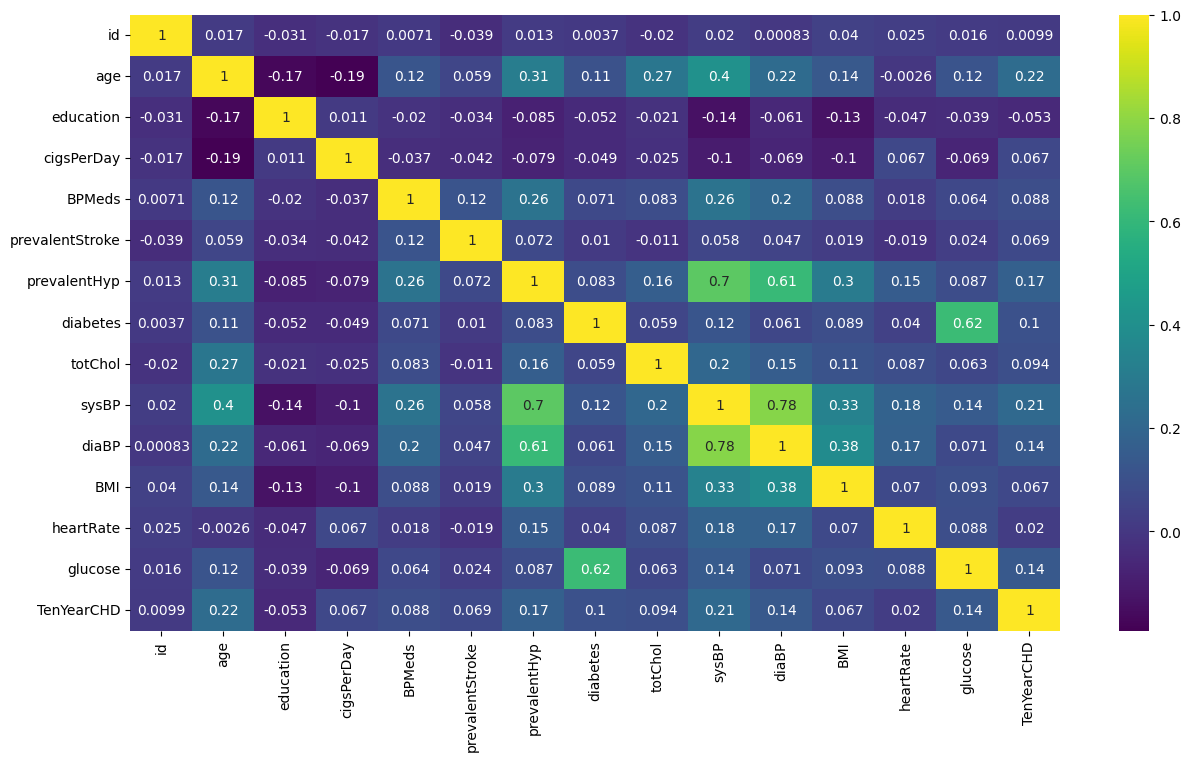

In [31]:
plt.figure(figsize=(15,8))
numerical_cardio_df = cardio_df.select_dtypes(include=['float64', 'int64'])
correlation = numerical_cardio_df.corr()
sns.heatmap(correlation, annot=True, cmap='viridis')
plt.show()  

## Initial General Observations

**At first glance, age, sysBP, and prevalentHyp are most highly correlated with TenYearCHD risk**

- **Column Names:** Need explanation (refer to the start of the project).
- **Missing explanation:** The 'education' feature is not described in the data card, and it has a very low correlation with TenYearCHD 
- **Null Values:** Present in education, cigsPerDay, BPMeds, totChol, BMI, heartRate, and glucose columns. 11.4% of the dataset rows include missing values.
- **Data Structure:** The dataset consists of 3390 rows and 17 columns.
- **CHD Risk:** Approximately 15% of the sample is at risk for developing CHD in the next 10 years.
- **Data Types:** Values are primarily floats or integers, except for the columns 'sex' and 'is_smoking' which are objects.
- **Encoding Needed:** The 'sex' and 'is_smoking' columns need to be encoded to be included in analysis.
- **Correlations**: At first glance, age, prevalanctHyp, sysBP, diaBP and glucose are most highly correlated with TenYearCHD

## Initial statistical observations:
**Age**
- **Average age:** Approximately 49.5 years.
- **Age range:** 32 to 70 years.

**Education**
- **Average education level:** Approximately 2, with levels ranging from 1 to 4.
- **Education Distribution:** 25% of participants have a level of 1, and 75% have a level of 3 or lower.

**Cigarettes Per Day**
- **Average:** About 9 cigarettes per day.
- **Variation:** Standard deviation of around 11.88.
- **Non-smokers:** Half of the participants do not smoke at all (median = 0).

**Blood Pressure Medication (BPMeds)**
- **Usage:** Most participants do not take blood pressure medication.
- **Non-users:** 75% of participants are not on BP medication.

**Prevalent Stroke**
- **Prevalence:** Very low, with only about 0.65% of participants having had a stroke.

**Prevalent Hypertension (prevalentHyp)**
- **Prevalence:** Around 31.5% of participants have hypertension.

**Diabetes**
- **Prevalence:** Only about 2.6% of participants have diabetes.

**Total Cholesterol (totChol)**
- **Average level:** 237.07 mg/dL.
- **Range:** From 107 to 696 mg/dL, indicating some extreme values.

**Systolic Blood Pressure (sysBP)**
- **Average pressure:** 132.6 mmHg.
- **Range:** From 83.5 to 295 mmHg, suggesting some participants have very high blood pressure.

**Diastolic Blood Pressure (diaBP)**
- **Average pressure:** 82.88 mmHg.
- **Range:** From 48 to 142.5 mmHg.

**Body Mass Index (BMI)**
- **Average BMI:** Approximately 25.79.
- **Standard Deviation:** 4.12.
- **BMI Range:** From 15.96 to 56.8, indicating a wide range of body types from underweight to severely obese.

**Heart Rate**
- **Average rate:** About 76 beats per minute.
- **Range:** From 45 to 143 bpm.

**Glucose**
- **Average level:** 82.09 mg/dL.
- **Range:** From 40 to 394 mg/dL.


### 1. Data Cleaning

## 1.1 Handling Missing Values

Drop education column due to missing feature explanation and low correlation with TenyearCHD

In [36]:
cardio_df.drop(['education'],axis=1,inplace=True)

Confirm education column was dropped

In [38]:
print(cardio_df.columns)

Index(['id', 'age', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')


Drop rows with missing values since 11% is low and it is desirable to maintain integrity of the data 

In [40]:
cardio_df.dropna(axis=0,inplace=True)

Confirm rows with missing values were dropped

In [42]:
num_entries = cardio_df.shape[0]
print("Number of entries:", num_entries)

Number of entries: 3004


## 1.2 Correcting Data Types and Formatting

Change object features ('sex' and 'is_smoking') to numerical to be included in future analysis

In [45]:
unique_sex = cardio_df['sex'].unique()
print("Unique entries in 'sex' column:", unique_sex)

unique_smoking = cardio_df['is_smoking'].unique()
print("Unique entries in 'is_smoking' column:", unique_smoking)


Unique entries in 'sex' column: ['M' 'F']
Unique entries in 'is_smoking' column: ['NO' 'YES']


In [46]:
sex_code = {'M' : 0, 'F': 1}
cardio_df['sex_code'] = cardio_df.sex.map(sex_code)

smoking_code = {'NO' : 0, 'YES': 1}
cardio_df['smoking_code'] = cardio_df.is_smoking.map(smoking_code)

Ensure columns were added correctly 

In [48]:
selected_columns = cardio_df[['sex', 'is_smoking', 'sex_code', 'smoking_code']]

print("First 5 rows:")
print(selected_columns.head())

print("Last 5 rows:")
print(selected_columns.tail())


First 5 rows:
  sex is_smoking  sex_code  smoking_code
1   M         NO         0             0
2   F        YES         1             1
3   M        YES         0             1
4   F        YES         1             1
5   F         NO         1             0
Last 5 rows:
     sex is_smoking  sex_code  smoking_code
3384   F         NO         1             0
3385   F         NO         1             0
3386   F         NO         1             0
3387   M        YES         0             1
3389   F         NO         1             0


## 1.3 Investigating for Outliers

In [50]:
print(cardio_df.describe())

                id          age   cigsPerDay       BPMeds  prevalentStroke  \
count  3004.000000  3004.000000  3004.000000  3004.000000      3004.000000   
mean   1690.450399    49.521305     9.078562     0.030293         0.005992   
std     983.334315     8.595076    11.890855     0.171421         0.077189   
min       1.000000    32.000000     0.000000     0.000000         0.000000   
25%     835.750000    42.000000     0.000000     0.000000         0.000000   
50%    1683.500000    49.000000     0.000000     0.000000         0.000000   
75%    2542.250000    56.000000    20.000000     0.000000         0.000000   
max    3389.000000    70.000000    70.000000     1.000000         1.000000   

       prevalentHyp     diabetes      totChol        sysBP        diaBP  \
count   3004.000000  3004.000000  3004.000000  3004.000000  3004.000000   
mean       0.314913     0.027297   237.222370   132.591711    82.923103   
std        0.464559     0.162974    45.267516    22.270882    12.038348 

## Outlier Analysis: Medical Plausibility
## According to sources below, none of the potential outliers are medically impossible, thus were included unchanged in the dataset to maintain data integrity

### Cigarettes Per Day (`cigsPerDay`)
- **70 cigarettes per day** is extremely high but not medically impossible, equating to about 3.5 packs per day (assuming 20 cigarettes per pack).
- 
References:

https://www.statista.com/forecasts/997162/cigarettes-smoked-per-day-in-the-us

Shiffman S. How many cigarettes did you smoke? Assessing cigarette consumption by global report, Time-Line Follow-Back, and ecological momentary assessment. Health Psychol. 2009 Sep;28(5):519-26. doi: 10.1037/a0015197. PMID: 19751076; PMCID: PMC2762359.

### Total Cholesterol (`totChol`)
- **696 mg/dL** is exceptionally high, typically observed in severe cases of familial hypercholesterolemia or other metabolic disorders, thus not impossible.

Reference:

Cuchel, M., Lee, P. C., Hudgins, L. C., Duell, P. B., Ahmad, Z., Baum, S. J., Linton, M. F., ... McGowan, M. P. (2023). Contemporary homozygous familial hypercholesterolemia in the United States: Insights from the CASCADE FH registry. Journal of the American Heart Association, 12(9). https://doi.org/10.1161/JAHA.122.029175

### Systolic Blood Pressure (`sysBP`)
- **295 mmHg** indicates severe hypertension, which, while rare and critical, can occur, particularly in acute conditions or with severe chronic hypertension.

### Diastolic Blood Pressure (`diaBP`)
- **142.5 mmHg** is also very high. Like systolic pressure, this level indicates severe hypertension, potentially leading to hypertensive crises but remains within medical possibility.

Reference:

Kannel, William B. "Elevated systolic blood pressure as a cardiovascular risk factor." The American journal of cardiology 85.2 (2000): 251-255

### Body Mass Index (`BMI`)
- **56.8** indicates extreme obesity. Such a BMI is associated with significant health risks but is seen in clinical settings, indicating it's not medically impossible.

Reference:

Wang, Zhi Jian, et al. "Association of body mass index with mortality and cardiovascular events for patients with coronary artery disease: a systematic review and meta-analysis." Heart 101.20 (2015): 1631-1638.


### Heart Rate (`heartRate`)
- **143 beats per minute** can occur under conditions such as stress, physical exertion, or specific health conditions like tachycardia. It is high but not impossible.

Reference:

Woodward, Mark, et al. "The association between resting heart rate, cardiovascular disease and mortality: evidence from 112,680 men and women in 12 cohorts." European journal of preventive cardiology 21.6 (2014): 719-726.

### Glucose
- **394 mg/dL** reflects severe hyperglycemia, often seen in cases like unmanaged diabetes or diabetic ketoacidosis. It represents a critical but not impossible medical scenario.

Reference:

University of Michigan Medicine. (2019, June). High blood sugar (Hyperglycemia). Patient Education by Michigan Medicine. Licensed under CC BY-NC-SA 4.0. Available from https://www.med.umich.edu/1libr/MEND/Diabetes-Hyperglycemia.pdf

# Exploratory Data Analysis (EDA)
Goal: Analyze and understand the underlying patterns, relationships and structures within the dataset.

Objectives:
* Data visualization: Use graphical techniques to visualize distributions, relationships and trends
* Feature selection: Identify important features and relationships that may influence analysis/model building
* Hypothesis generation: Formulate hypotheses or questions that can be teste dthrough further statistical analysis/predictive modeling

**Exploring Distributions**

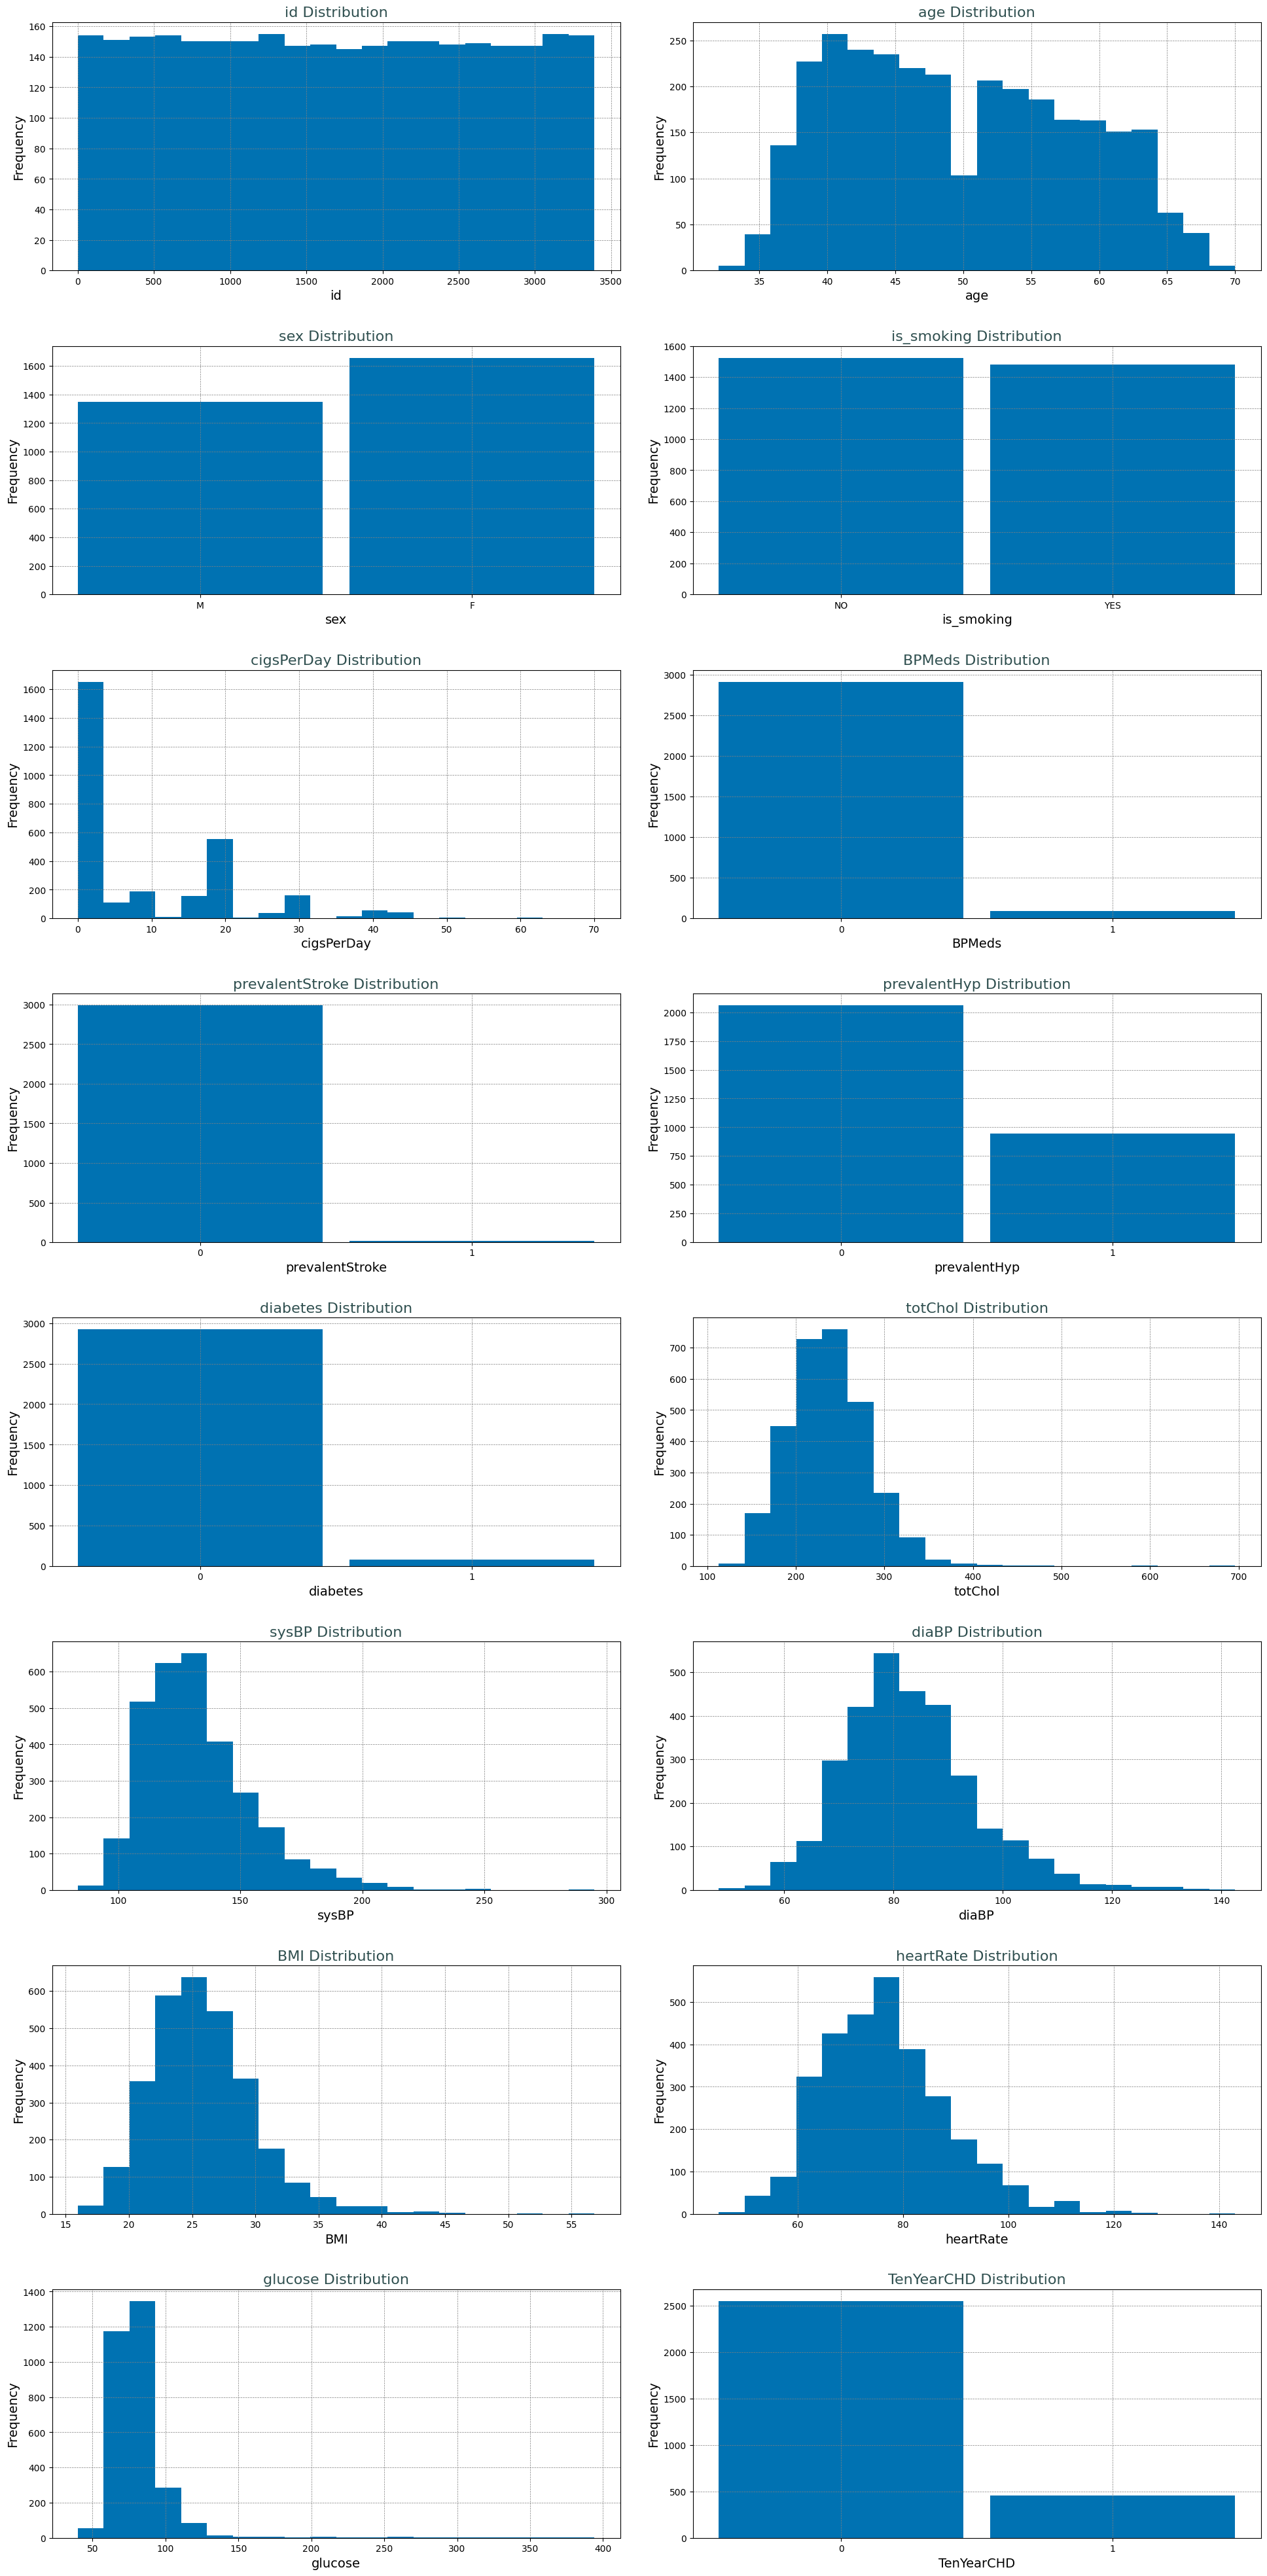

In [54]:
plt.style.use('seaborn-v0_8-colorblind')

def draw_histograms(dataframe, features, rows, cols):
    fig = plt.figure(figsize=(cols * 10, rows * 5))  
    
    features = [feat for feat in features if feat not in ['sex_code', 'smoking_code']]
    binary_features = ['sex', 'is_smoking', 'TenYearCHD', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'BPMeds']
    for i, feature in enumerate(features):
        ax = fig.add_subplot(rows, cols, i + 1)
        if feature in binary_features or dataframe[feature].nunique() == 2:  
            bars = dataframe[feature].hist(bins=[-0.5, 0.5, 1.5], ax=ax, rwidth=0.9)
            ax.set_xticks([0, 1])  # Set x-ticks to only show 0 and 1
        else:
            bars = dataframe[feature].hist(bins=20, ax=ax)
        ax.set_title(feature + " Distribution", color='darkslategray', fontsize=16)
        ax.set_xlabel(feature, fontsize=14)
        ax.set_ylabel('Frequency', fontsize=14)
        ax.grid(True, linestyle='--', linewidth=0.5, color='grey')

    fig.tight_layout(pad=3.0)
    plt.show()

num_features = len([col for col in cardio_df.columns if col not in ['sex_code', 'smoking_code']])
num_rows = (num_features + 1) // 2  # Calculate the number of rows needed
draw_histograms(cardio_df, cardio_df.columns, num_rows, 2)


**Observations**

**Several of the features do not have normal distributions, including age, sysBP and diaBP**. Because **logistic regression models assume normal distribution**, I considered applying log transformation to the data. However, some medical literature states that the application of logarithmic transformation generally does not significantly reduce data variability nor align the data more closely with a normal distribution. Furthermore, the outcomes of conventional statistical analyses conducted on log-transformed data may not be pertinent to the data in its original, non-transformed state. 

I chose to use **StandardScaler** later on in data cleaning stage for my data because it can handle non-normal distributions if used consistently across all features 
References

Feng C, Wang H, Lu N, Chen T, He H, Lu Y, Tu XM. Log-transformation and its implications for data analysis. Shanghai Arch Psychiatry. 2014 Apr;26(2):105-9. doi: 10.3969/j.issn.1002-0829.2014.02.009. Erratum in: Gen Psychiatr. 2019 Sep 6;32(5):e100146corr1. doi: 10.1136/gpsych-2019-100146corr1. PMID: 25092958; PMCID: PMC4120293.



## Explore Variable Correlations

| Absolute Magnitude of the Observed Correlation Coefficient | Interpretation          |
|------------------------------------------------------------|-------------------------|
| 0.00 - 0.10                                                | Negligible correlation  |
| 0.10 - 0.39                                                | Weak correlation        |
| 0.40 - 0.69                                                | Moderate correlation    |
| 0.70 - 0.89                                                | Strong correlation      |
| 0.90 - 1.00                                                | Very strong correlation |

Reference

Correlation Coefficients: Appropriate Use and Interpretation. February 2018. Anesthesia & Analgesia, 126(5):1. DOI:10.1213/ANE.0000000000002864. License CC BY-NC-ND 4.0.

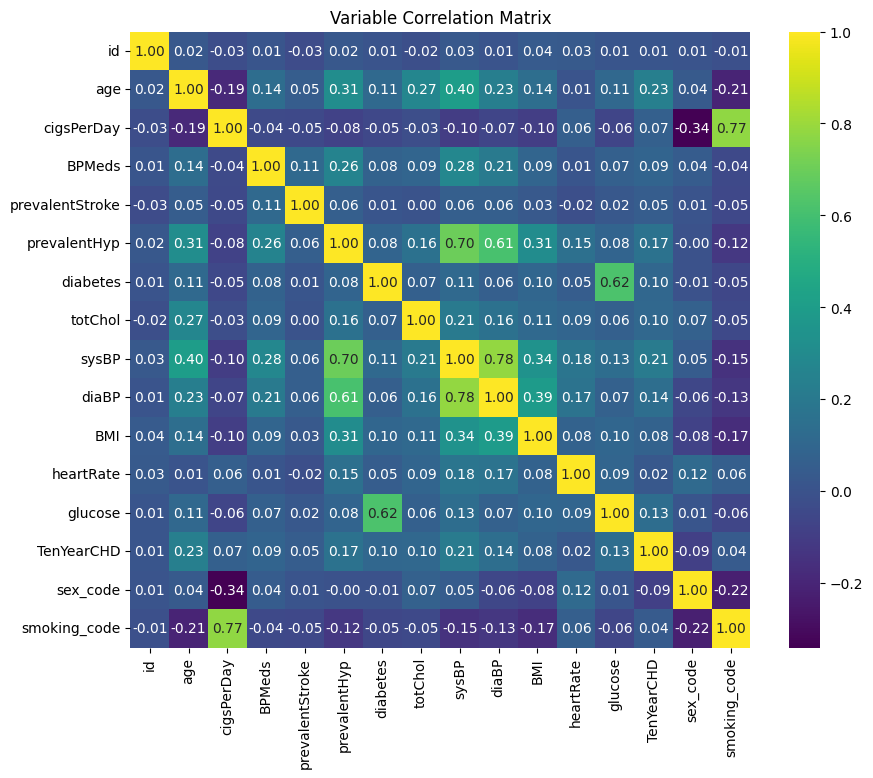

In [57]:
numeric_cardio_df = cardio_df.select_dtypes(include=[np.number])
correlation_matrix = numeric_cardio_df.corr()

plt.figure(figsize=(10, 8))  # Adjust the size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Variable Correlation Matrix')
plt.show()

## Insights from Correlation Matrix:

### Strong Correlations:

- **sysBP and diaBP**: Very strong correlation of **0.783**, reflecting their common role in blood pressure measurement.

### Moderate Correlations:

- **Age and sysBP**: Significant correlation of **0.403**, indicative of increasing systolic blood pressure with age.
- **Age and prevalentHyp**: Moderate correlation of **0.310**, showing increasing hypertension prevalence with age.
- **sysBP and prevalentHyp**: Strong correlation of **0.699**, suggesting higher systolic pressure is often seen with hypertension.
- **BMI and diaBP**: Moderate correlation of **0.389**, suggesting that higher body weight may influence blood pressure levels.

### Health Outcomes:

- **TenYearCHD**: Moderate correlations with **age (0.231)**, **sysBP (0.213)**, and **glucose (0.135)**, indicating predictive factors for coronary heart disease risk over ten years.
- **cigsPerDay and TenYearCHD**: Weak correlation of **0.067**, showing a slight influence of smoking on heart disease risk.

### Negative Correlations:

- **cigsPerDay and age**: Negative correlation of **-0.186** suggests younger individuals tend to smoke more, or older individuals reduce smoking.
- **sex_code and cigsPerDay**: Strong negative correlation of **-0.340** indicates males may be more likely to smoke than females.

### Diabetes Related:

- **Glucose and diabetes**: Very strong correlation of **0.619**, highlighting the direct impact of glucose levels on diabetes.

### Other Notable Points:

- **BMI**: Shows weak negative correlations with **cigsPerDay (-0.098)** and **smoking_code (-0.170)**, indicating smokers might have a lower BMI.
- **heartRate**: Displays a very weak positive correlation with **smoking_code (0.058)** and a negligible negative correlation with **prevalentStroke (-0.018)**.


## Implications for Variable Inclusion in Logistic Regression

### Significant Predictors
- **Age and sysBP (systolic blood pressure)**: Both are significant predictors of CHD, showing moderate to strong correlations with the outcome variable (TenYearCHD). Age correlates with sysBP at **0.403** and with TenYearCHD at **0.231**.

- **Glucose Levels**: Given its strong correlation with diabetes (**0.619**) and moderate correlation with TenYearCHD (**0.134**), glucose is a key predictor, especially considering diabetes as a major risk factor for heart disease.

### Avoid Multicollinearity
- **sysBP and diaBP**: Highly correlated (**0.783**). Prefer sysBP for inclusion because it is a stronger predictor for CHD risk, with a correlation of **0.213** with TenYearCHD compared to **0.137** for diaBP.

- **cigsPerDay and smoking_code**: Highly correlated (**0.775**), suggesting redundancy if both are included.

### Possible Synergistic Effects
- **Interactions between Age and Blood Pressure**: The interaction could affect CHD risk variably across different age groups, considering both age and sysBP independently correlate with CHD.

- **Smoking and Cholesterol Metabolism**: While the direct correlation between cigsPerDay and totChol isn't strong, considering the biological plausibility of smoking influencing cholesterol metabolism could yield deeper insights into CHD risk.

- **BMI and Diabetes**: While the direct correlations with CHD are weaker, considering BMI in relation to diabetes could provide valuable insights into overall metabolic health and its impact on CHD.



## Monitoring for difference in correlations among smoker vs. non-smoker groups

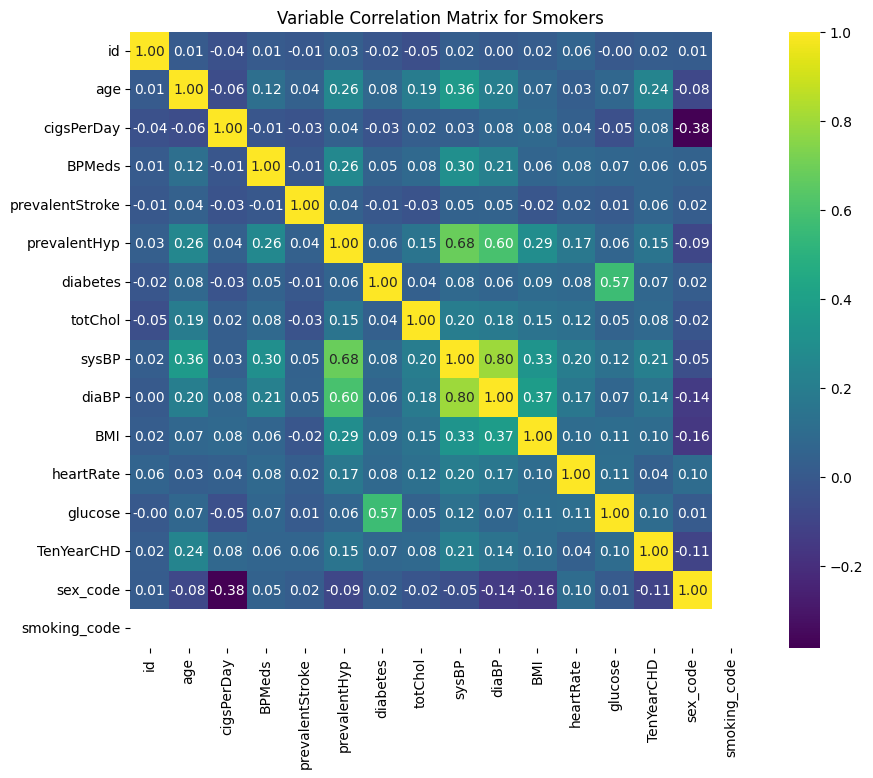

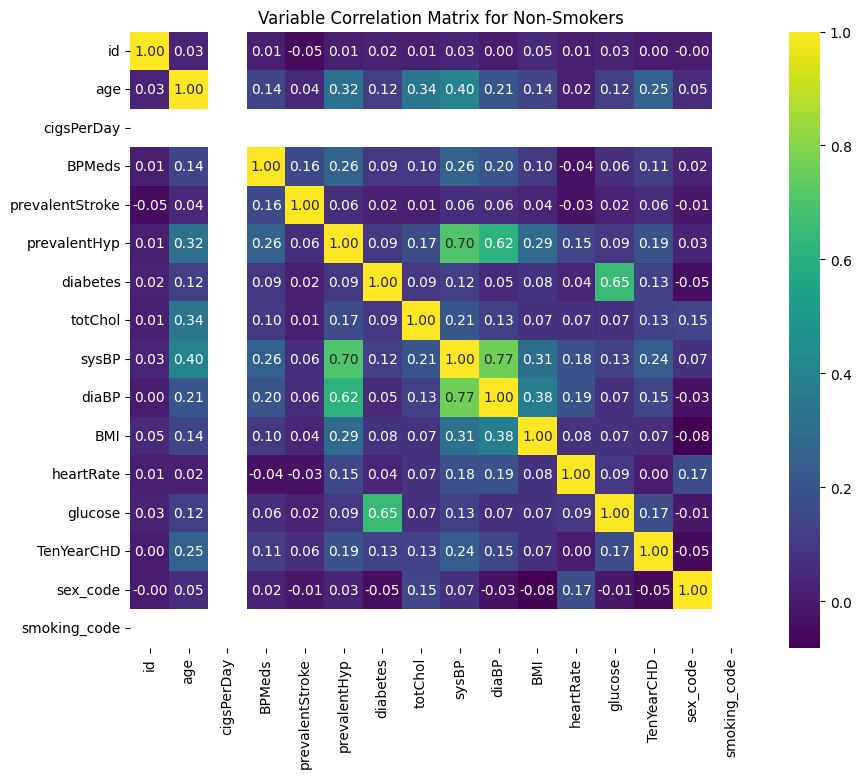

In [61]:
numeric_cardio_df = cardio_df.select_dtypes(include=[np.number])

smokers_df = numeric_cardio_df[numeric_cardio_df['smoking_code'] == 1]
non_smokers_df = numeric_cardio_df[numeric_cardio_df['smoking_code'] == 0]

correlation_matrix_smokers = smokers_df.corr()
correlation_matrix_non_smokers = non_smokers_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_smokers, annot=True, cmap='viridis', fmt=".2f")
plt.title('Variable Correlation Matrix for Smokers')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_non_smokers, annot=True, cmap='viridis', fmt=".2f")
plt.title('Variable Correlation Matrix for Non-Smokers')
plt.show()

## Insights from Correlation Matrices

### Age and Blood Pressure:
- **Smokers and Non-Smokers**: Age consistently shows a strong positive correlation with both systolic (sysBP) and diastolic blood pressure (diaBP) across both groups. 
  - **Non-Smokers**: The correlation is slightly stronger, indicating a more pronounced effect of age on blood pressure among non-smokers.

### Diabetes and Glucose:
- **Non-Smokers**: A stronger correlation between diabetes and glucose levels suggests that in non-smokers, the impact of diabetes on glucose levels might be more direct and less influenced by other factors compared to smokers.

### Prevalent Hypertension:
- **Non-Smokers**: There is a stronger correlation between prevalent hypertension and blood pressure measurements, suggesting that the relationship is more pronounced in non-smokers.

## Implications for Logistic Regression Model

Given the observed consistency in the relationships between key health indicators and coronary heart disease (CHD) risk factors across both smokers and non-smokers:
- **Unified Model Justification**: The correlation matrices indicate that predictors exhibit similar strengths and patterns of association with CHD across different smoking statuses.
- **Modeling Strategy**: Using a single logistic regression model is justified. This approach simplifies the modeling process, enhances statistical power by utilizing the entire dataset, and ensures comprehensive insights into factors influencing CHD risk.
- **Interaction Terms**: Including interaction terms for smoking status within the single model can account for any subtle differences, ensuring robust and nuanced analysis without the need for separate models.


## Investigate for correlation differences among 3 distinct age groups: 32-44, 45-57, 58-70 

In [64]:
age_range = cardio_df['age'].agg(['min', 'max'])
print(age_range)


min    32
max    70
Name: age, dtype: int64


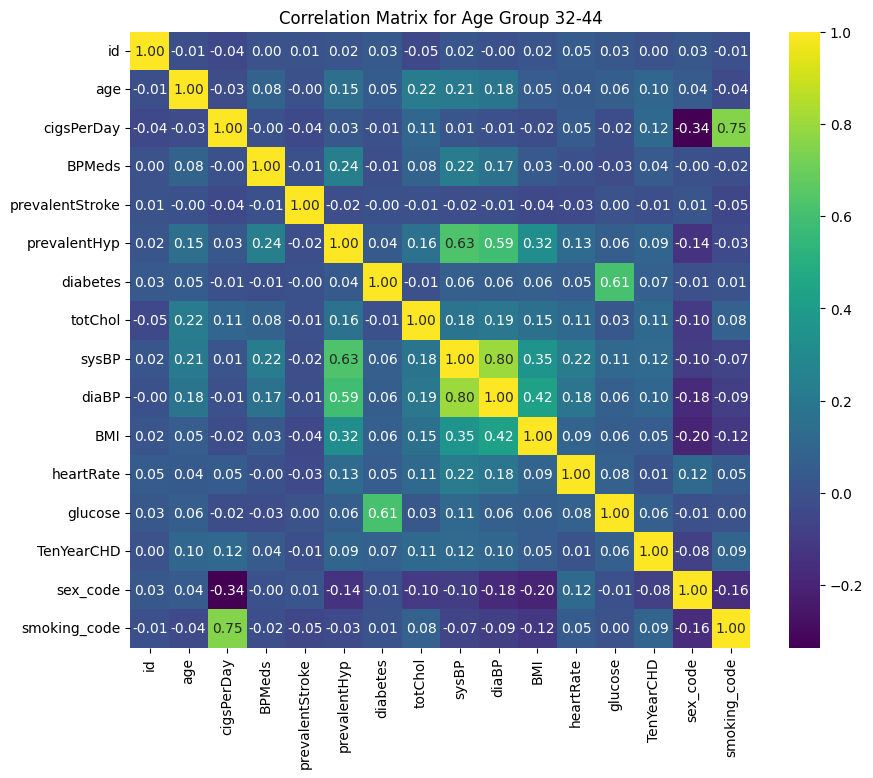

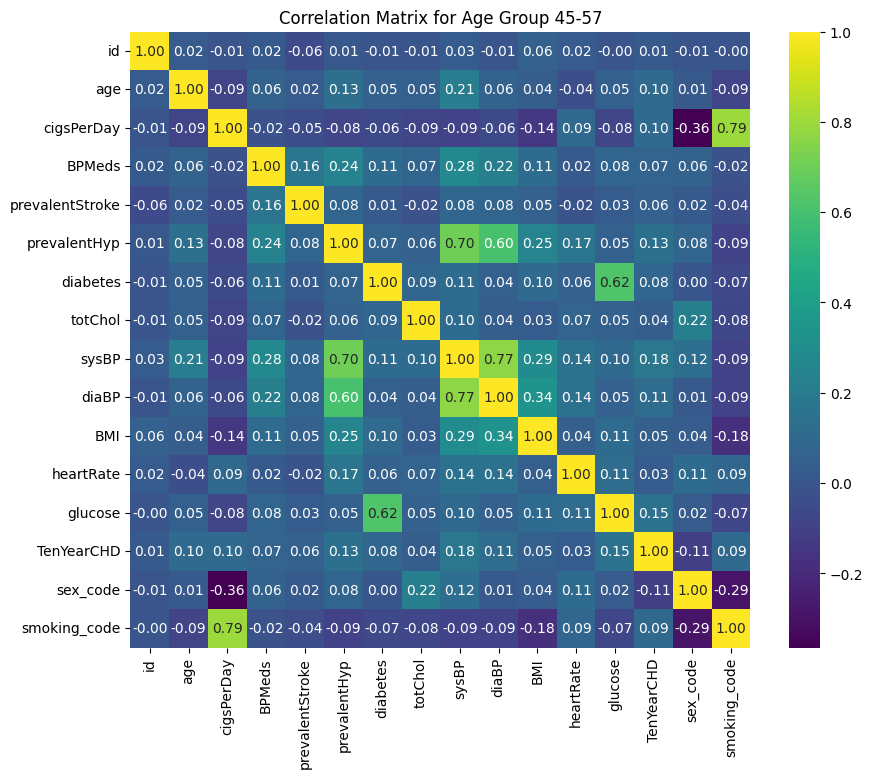

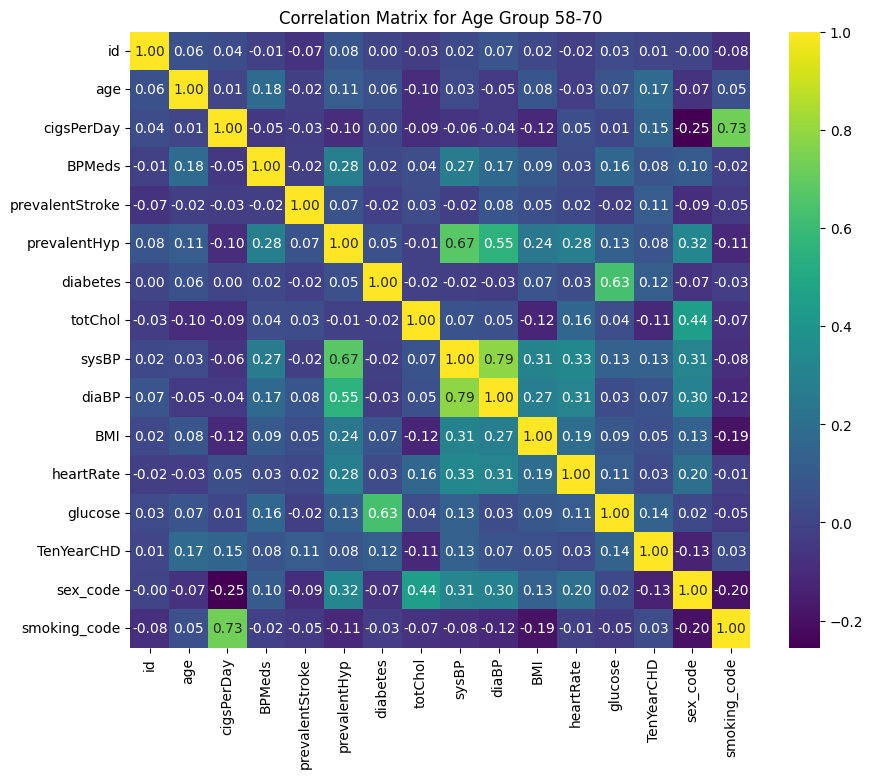

In [65]:
median_age = cardio_df['age'].median()
iqr_age = cardio_df['age'].quantile(0.75) - cardio_df['age'].quantile(0.25)

age_bins = [median_age + x * iqr_age for x in [-1.0, 0, 1.0, 1.5]]

age_labels = ['32-44', '45-57', '58-70']

cardio_df['age_group'] = pd.cut(cardio_df['age'], bins=age_bins, labels=age_labels, include_lowest=True)

for group in age_labels:
    group_df = cardio_df[cardio_df['age_group'] == group]
    numeric_group_df = group_df.select_dtypes(include=[np.number])
    correlation_matrix = numeric_group_df.corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
    plt.title(f'Correlation Matrix for Age Group {group}')
    plt.show()


## Insights from Correlation Matrices by Age Groups

### Summary of Main Findings:

- **Age and Blood Pressure:**
  - Consistently strong correlation between age and blood pressure (sysBP and diaBP) across all age groups. The strength of these relationships shows a slight increase with age, particularly notable in the 58-70 group with sysBP and diaBP correlations at 0.786 and 0.786, respectively.

- **Smoking Habits:**
  - Smoking shows varied correlations with other health factors. Interestingly, the degree of smoking (cigarettes per day) has a high correlation with smoking_code in the younger age group, which diminishes with age.

- **Diabetes and Glucose Levels:**
  - The correlation between diabetes and glucose levels remains robust across all age groups. It is particularly strong in the oldest age group with a correlation of 0.632, underscoring the consistent impact of glucose management on diabetes.

- **BMI and Blood Pressure:**
  - A noticeable relationship between BMI and blood pressure metrics across all groups, particularly strong in the oldest age group with BMI and sysBP correlation at 0.308 and BMI and diaBP at 0.274. This indicates the role of body weight in cardiovascular health, which persists across all age groups.

- **Cholesterol Levels:**
  - Total cholesterol shows consistent correlations with blood pressure and other cardiovascular risk factors across the different age groups, with moderate correlations observed in the middle age group.

### Model Recommendations:

Given the overall consistency in the key relationships across different age groups, a **single logistic regression model encompassing the entire dataset is advisable**. This approach allows for a comprehensive analysis that captures the influence of various predictors on the outcome across the entire age spectrum without the need for segmenting by age. Incorporating age as a continuous variable or testing its interactions with other predictors in the model can sufficiently account for any age-specific variations in the effects. This strategy enhances model simplicity and statistical power while providing a holistic view of the factors influencing health outcomes.


## Explore Relationships using PairPlots

**Recall from Health Outcomes discussed earlier**:

- **TenYearCHD**: Moderate correlations with **age (0.231)**, **sysBP (0.213)**, and **glucose (0.135)**, indicating predictive factors for coronary heart disease risk over ten years.
- **cigsPerDay and TenYearCHD**: Weak correlation of **0.067**, showing a slight influence of smoking on heart disease risk.

## PairPlots exploring features positively correlated with TenYearCHD

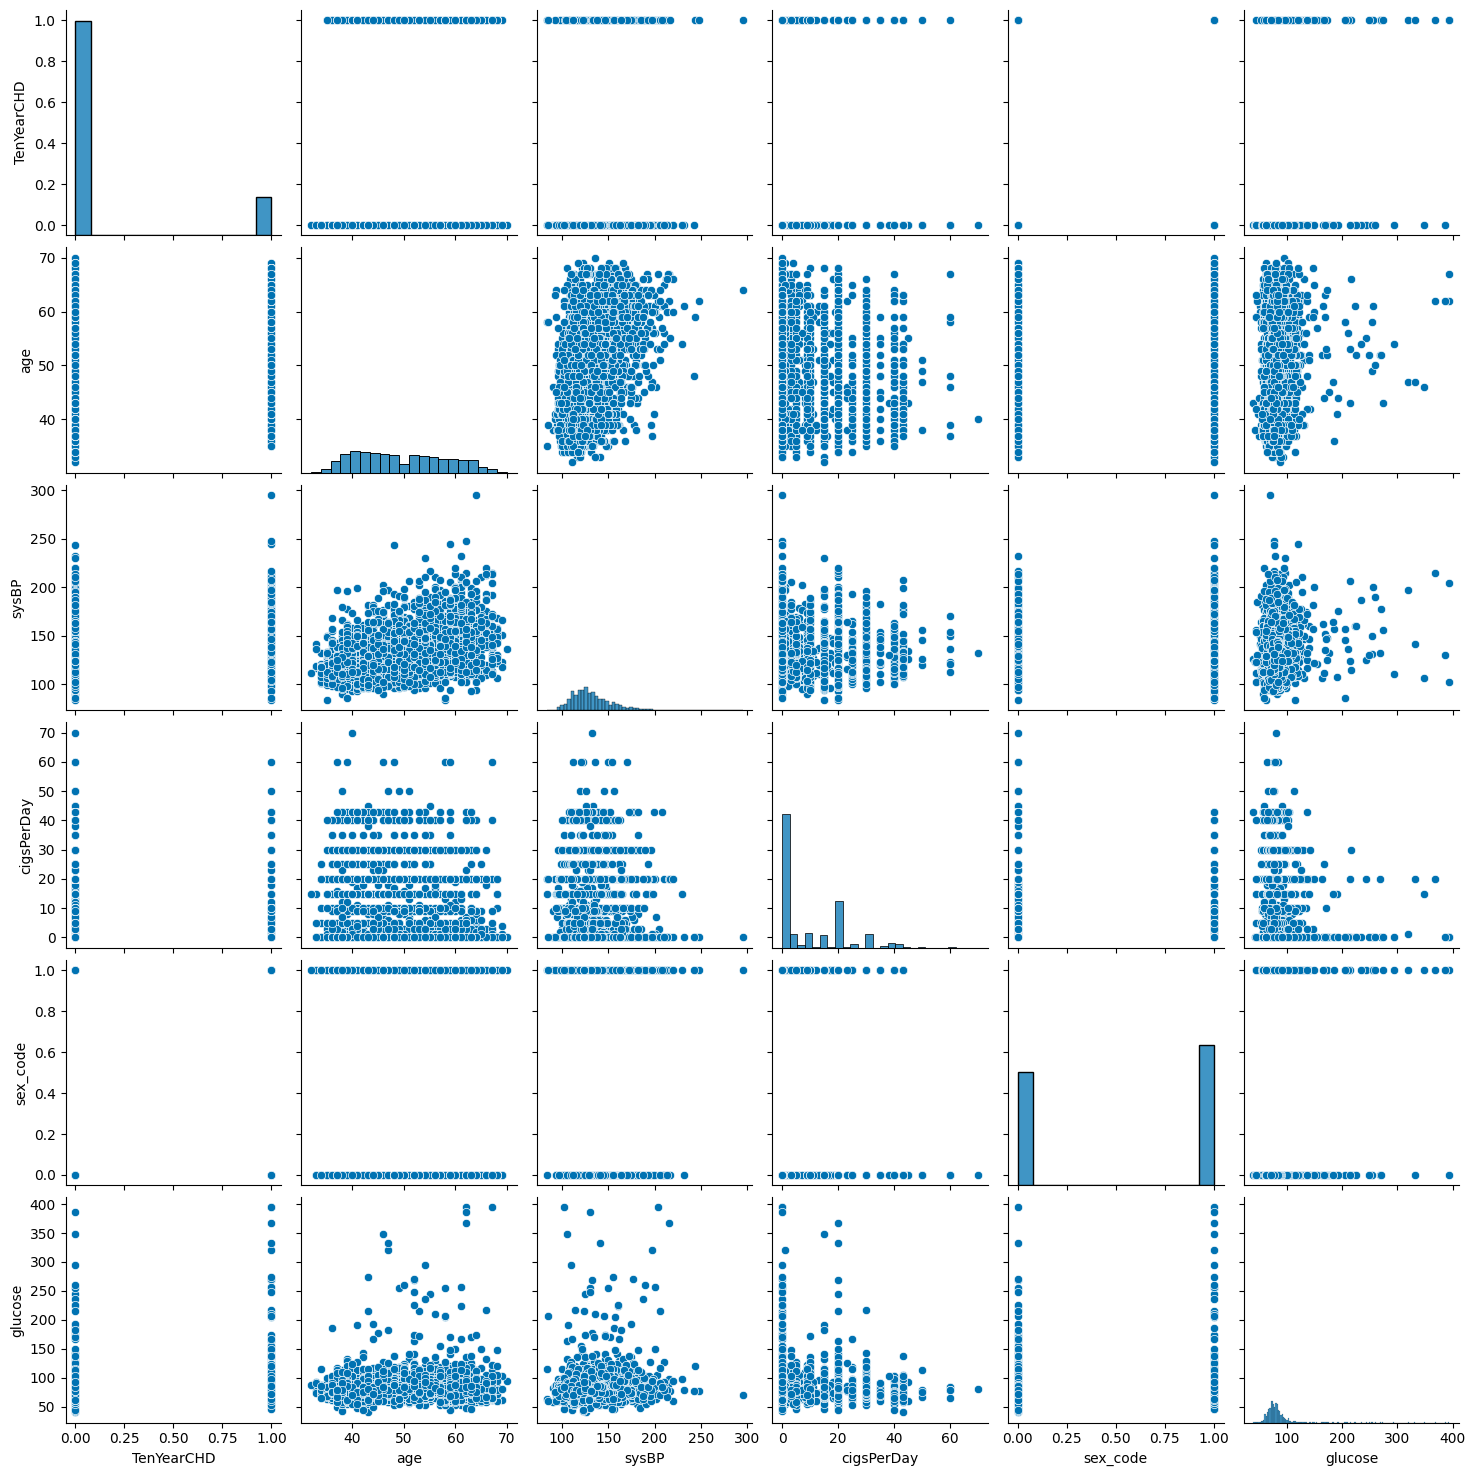

In [69]:
columns_of_interest = ['TenYearCHD', 'age', 'sysBP', 'cigsPerDay', 'sex_code', 'glucose']
filtered_df = cardio_df[columns_of_interest]

interestpairplot = sns.pairplot(filtered_df)

plt.show()


## PairPlots exploring features positively correlated with TenYearCHD with color coding by risk presence

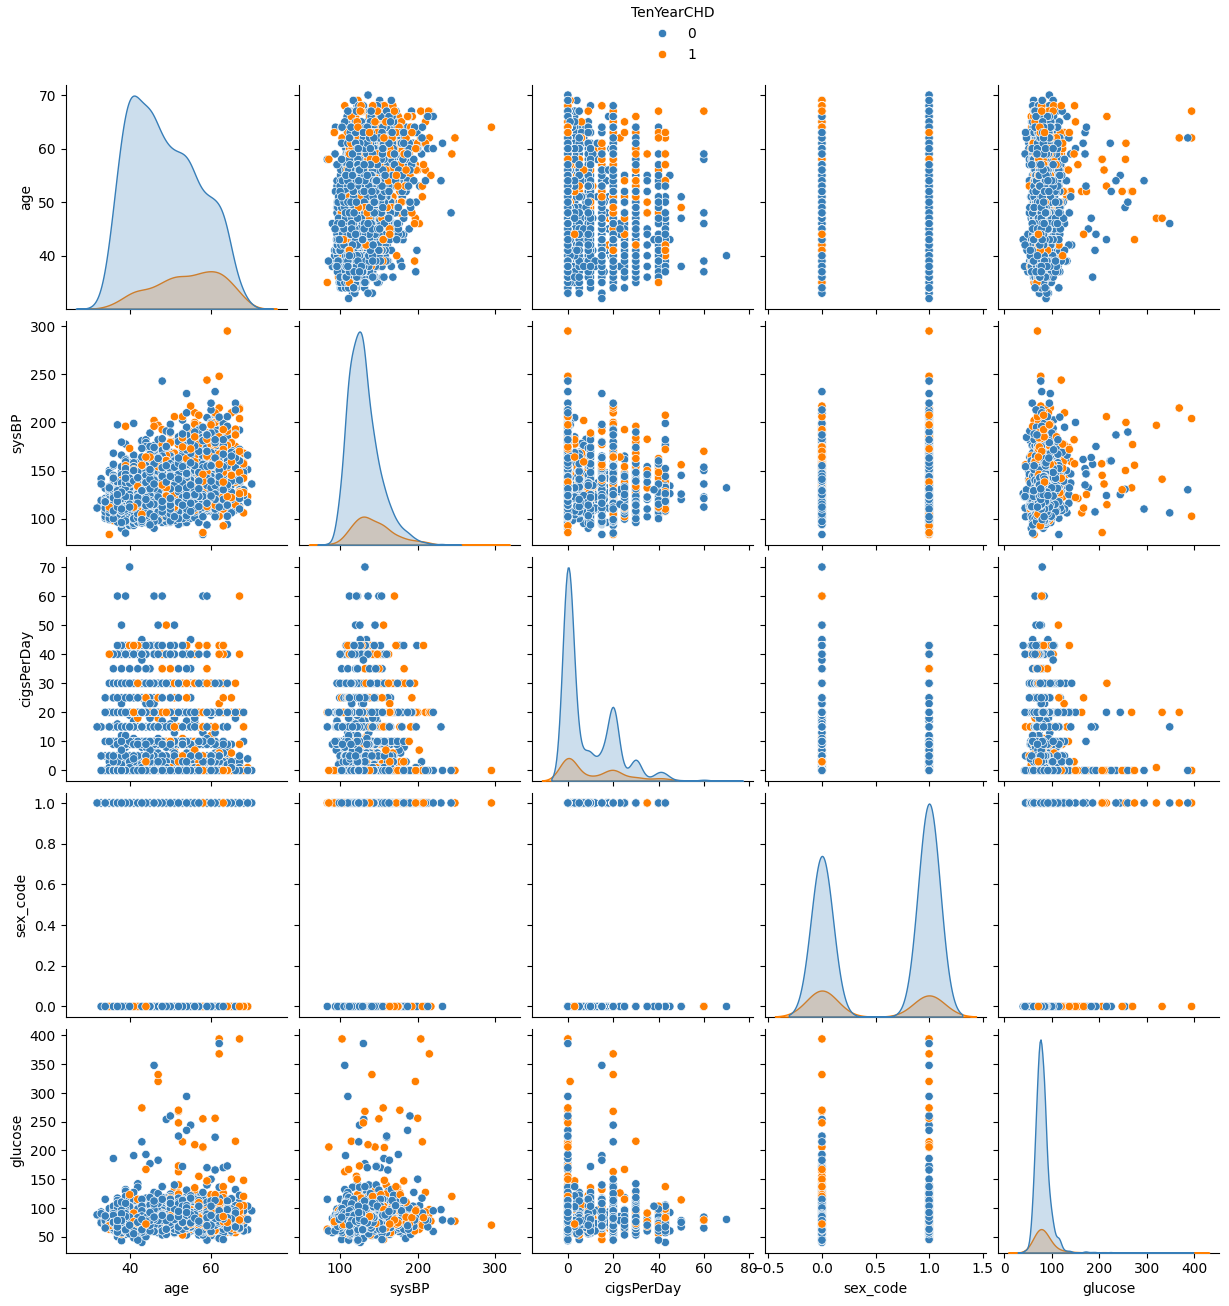

In [71]:
columns_of_interest = ['TenYearCHD', 'age', 'sysBP', 'cigsPerDay', 'sex_code', 'glucose']
filtered_df = cardio_df[columns_of_interest]

interestpairplot = sns.pairplot(filtered_df, hue='TenYearCHD', palette=color_blind_friendly_palette)

interestpairplot._legend.set_bbox_to_anchor((0.5, 1.05)) 
interestpairplot._legend.set_loc('upper center')

plt.show()

## Explore Relationships using Box Plots

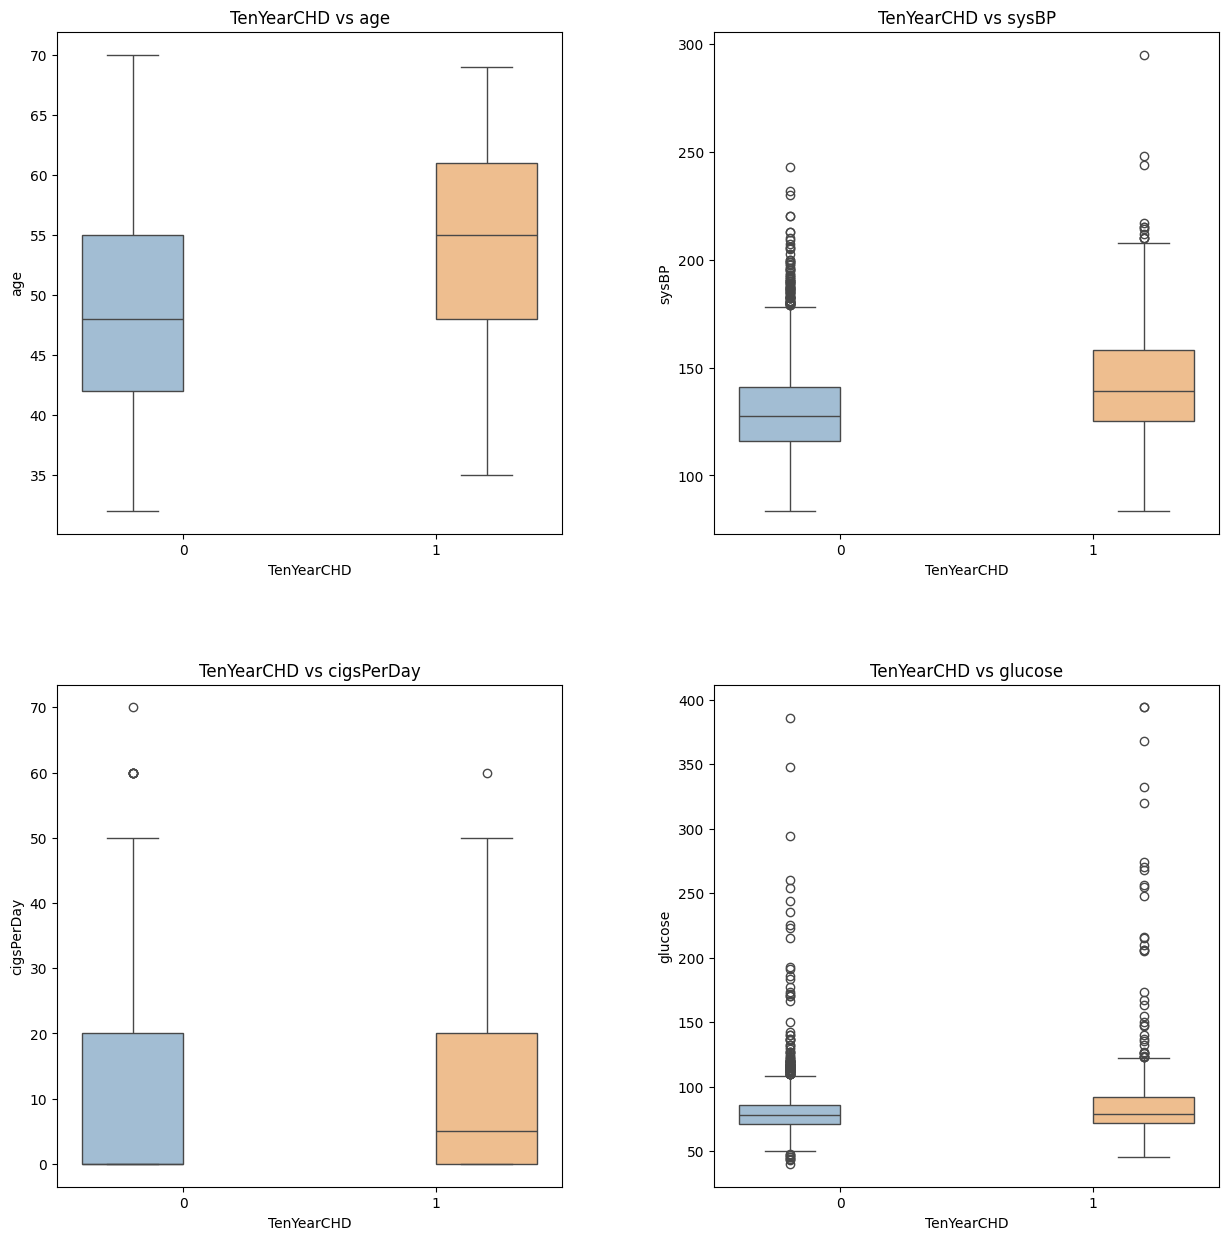

In [73]:
columns_of_interest = ['age', 'sysBP', 'cigsPerDay', 'glucose']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

#Converts the 2D array of axes into a 1D array, allowing for easier iteration.
axes = axes.flatten()

for i, column in enumerate(columns_of_interest):
    create_boxplot(ax=axes[i], data=cardio_df, x='TenYearCHD', y=column, hue='TenYearCHD', palette=color_blind_friendly_palette)
    axes[i].set_title(f'TenYearCHD vs {column}')

plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()


**Explore numerical values for median, mean etc. and determine significance of difference in variables of interest in groups with and without TenYearCHD risk using p values**

In [75]:
def calculate_summary_statistics(df, groupby_col, columns):
    summary_list = []
    
    for col in columns:
        summary = df.groupby(groupby_col)[col].agg(
            median=('median'),
            mean=('mean'),
            std=('std'),
            min=('min'),
            max=('max'),
            percentile_25=(lambda x: x.quantile(0.25)),
            percentile_75=(lambda x: x.quantile(0.75))
        ).reset_index()
        
        summary.columns = [groupby_col] + [f"{col}_{stat}" for stat in summary.columns[1:]]
        summary_list.append(summary)
    
    summary_df = summary_list[0]
    for df in summary_list[1:]:
        summary_df = summary_df.merge(df, on=groupby_col)
    
    return summary_df

columns_of_interest = ['age', 'sysBP', 'cigsPerDay', 'glucose']

summary_df = calculate_summary_statistics(cardio_df, 'TenYearCHD', columns_of_interest)

from IPython.display import display
display(summary_df)

for chd_status in summary_df['TenYearCHD']:
    print(f"\nSummary for TenYearCHD = {chd_status}")
    for column in columns_of_interest:
        stats = summary_df[summary_df['TenYearCHD'] == chd_status][[
            f"{column}_median", f"{column}_mean", f"{column}_std", f"{column}_min", f"{column}_percentile_25", f"{column}_percentile_75", f"{column}_max"
        ]].iloc[0]
        print(f"\n{column.capitalize()}:")
        print(f"  Median: {stats[f'{column}_median']:.2f}")
        print(f"  Mean: {stats[f'{column}_mean']:.2f}")
        print(f"  Std Dev: {stats[f'{column}_std']:.2f}")
        print(f"  Min: {stats[f'{column}_min']:.2f}")
        print(f"  25th Percentile: {stats[f'{column}_percentile_25']:.2f}")
        print(f"  75th Percentile: {stats[f'{column}_percentile_75']:.2f}")
        print(f"  Max: {stats[f'{column}_max']:.2f}")

for column in columns_of_interest:
    group0 = cardio_df[cardio_df['TenYearCHD'] == 0][column]
    group1 = cardio_df[cardio_df['TenYearCHD'] == 1][column]
    t_stat, p_val = ttest_ind(group0, group1, nan_policy='omit')
    print(f"\nT-test for {column}:")
    print(f"  T-statistic: {t_stat:.2f}")
    print(f"  P-value: {p_val:.5f}")


,TenYearCHD,age_median,age_mean,age_std,age_min,age_max,age_percentile_25,age_percentile_75,sysBP_median,sysBP_mean,...,cigsPerDay_max,cigsPerDay_percentile_25,cigsPerDay_percentile_75,glucose_median,glucose_mean,glucose_std,glucose_min,glucose_max,glucose_percentile_25,glucose_percentile_75
0,0,48.0,48.679230,8.402926,32,70,42.0,55.0,127.5,130.576364,...,70.0,0.0,20.0,78.0,80.617982,18.983717,40.0,386.0,71.0,86.0
1,1,55.0,54.214442,8.138735,35,69,48.0,61.0,139.0,143.823851,...,60.0,0.0,20.0,79.0,89.656455,41.852002,45.0,394.0,72.0,92.0



Summary for TenYearCHD = 0

Age:
  Median: 48.00
  Mean: 48.68
  Std Dev: 8.40
  Min: 32.00
  25th Percentile: 42.00
  75th Percentile: 55.00
  Max: 70.00

Sysbp:
  Median: 127.50
  Mean: 130.58
  Std Dev: 20.66
  Min: 83.50
  25th Percentile: 116.00
  75th Percentile: 141.00
  Max: 243.00

Cigsperday:
  Median: 0.00
  Mean: 8.74
  Std Dev: 11.65
  Min: 0.00
  25th Percentile: 0.00
  75th Percentile: 20.00
  Max: 70.00

Glucose:
  Median: 78.00
  Mean: 80.62
  Std Dev: 18.98
  Min: 40.00
  25th Percentile: 71.00
  75th Percentile: 86.00
  Max: 386.00

Summary for TenYearCHD = 1

Age:
  Median: 55.00
  Mean: 54.21
  Std Dev: 8.14
  Min: 35.00
  25th Percentile: 48.00
  75th Percentile: 61.00
  Max: 69.00

Sysbp:
  Median: 139.00
  Mean: 143.82
  Std Dev: 27.08
  Min: 83.50
  25th Percentile: 125.00
  75th Percentile: 158.00
  Max: 295.00

Cigsperday:
  Median: 5.00
  Mean: 10.95
  Std Dev: 13.02
  Min: 0.00
  25th Percentile: 0.00
  75th Percentile: 20.00
  Max: 60.00

Glucose:
  Media

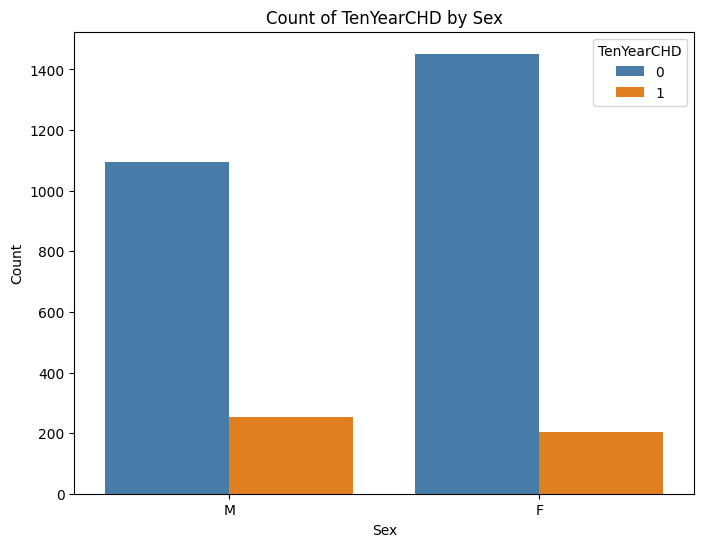

Percentage of males with TenYearCHD = 1: 18.71%
Percentage of females with TenYearCHD = 1: 12.37%


In [76]:
plt.figure(figsize=(8, 6))
sns.countplot(data=cardio_df, x='sex', hue='TenYearCHD', palette=color_blind_friendly_palette)
plt.title('Count of TenYearCHD by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='TenYearCHD')
plt.show()

total_males = cardio_df[cardio_df['sex'] == 'M'].shape[0]
total_females = cardio_df[cardio_df['sex'] == 'F'].shape[0]

males_with_chd = cardio_df[(cardio_df['sex'] == 'M') & (cardio_df['TenYearCHD'] == 1)].shape[0]
females_with_chd = cardio_df[(cardio_df['sex'] == 'F') & (cardio_df['TenYearCHD'] == 1)].shape[0]

percent_males_with_chd = (males_with_chd / total_males) * 100
percent_females_with_chd = (females_with_chd / total_females) * 100

print(f"Percentage of males with TenYearCHD = 1: {percent_males_with_chd:.2f}%")
print(f"Percentage of females with TenYearCHD = 1: {percent_females_with_chd:.2f}%")


In [77]:
columns_to_drop = ['sex', 'is_smoking', 'age_group']

cardio_df = cardio_df.drop(columns=[col for col in columns_to_drop if col in cardio_df.columns])

print(cardio_df.head())
print("\nRemaining columns:")
print(cardio_df.columns)

   id  age  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  diabetes  \
1   1   36         0.0     0.0                0             1         0   
2   2   46        10.0     0.0                0             0         0   
3   3   50        20.0     0.0                0             1         0   
4   4   64        30.0     0.0                0             0         0   
5   5   61         0.0     0.0                0             1         0   

   totChol  sysBP  diaBP    BMI  heartRate  glucose  TenYearCHD  sex_code  \
1    212.0  168.0   98.0  29.77       72.0     75.0           0         0   
2    250.0  116.0   71.0  20.35       88.0     94.0           0         1   
3    233.0  158.0   88.0  28.26       68.0     94.0           1         0   
4    241.0  136.5   85.0  26.42       70.0     77.0           0         1   
5    272.0  182.0  121.0  32.80       85.0     65.0           1         1   

   smoking_code  
1             0  
2             1  
3             1  
4             

## Insights 

## People with TenYearCHD risk have:

- **Higher median age**: 55 vs 48 in those without risk
- **Higher average age**: 54 vs 48 in those without risk

- **Higher median systolic blood pressure**: 139 vs 127.5 in those without risk
- **Higher average systolic blood pressure**: 143.8 vs 130.6 in those without risk

- **Higher median number of cigsPerDay**: 5 vs 0 in those without risk (meaning >50% of people without risk do not smoke)
- **Higher average number of cigsPerDay**: 10.95 vs 8.74 in those without risk

- **Slightly higher glucose but comparable**:
  - Median: 79 vs 78 in those without risk
  - Mean: 89.7 vs 80.6 in those without risk

- **Men are more likely to have risk of TenYearCHD**: 18.71% vs 12.37%

### P-values for differences in age, sysBP, cigsPerDay, and glucose between groups with and without TenYearCHD risk are all well below 0.05, indicating statistically significant differences between groups. Difference in glucose is less pronounced vs the other variables.




## Determining predictiveness using information value (IV)

**Indication for further exploration using IV**
While both IV and correlation coefficients are used to understand the relationships between variables, they serve different purposes and provide different insights. IV is more specific to binary classification and assesses the predictive power of a feature, whereas correlation coefficients measure the linear relationship between two continuous variables.

| IV value       | Predictiveness          |
|----------------|-------------------------|
| Less than 0.02 | Not useful for prediction |
| 0.02 to 0.1    | Weak predictive power    |
| 0.1 to 0.3     | Medium predictive power  |
| 0.3 to 1.0     | Strong predictive power  |
| > 1.0          | Very strong predictive power |

Reference:

Liebal, S. (2020, November 25). How to identify potential predictors for survey results using information value. Retrieved from https://microsoft.github.io/wpa/articles/IV-report.html


The following code calculates the Information Value (IV) for each feature in a DataFrame, which is used to assess the predictive power of features in binary classification problems. [Code explanation available here](https://docs.google.com/document/d/1Y3qukoqBMMU0LzKGW-7CI5FgquhZ86csgcQJOHiBKvg/edit?usp=sharing)

In [81]:
def calc_iv(df, feature, target, pr=0):
    lst = []
    epsilon = 1e-10  # Small constant to avoid division by zero

    for val in df[feature].unique():
        all_count = df[df[feature] == val].shape[0]
        bad_count = df[(df[feature] == val) & (df[target] == 1)].shape[0]
        lst.append([feature, val, all_count, bad_count])

    data = pd.DataFrame(lst, columns=['Variable', 'Value', 'All', 'Bad'])
    data = data[data['Bad'] > 0]

    if data.empty:
        return np.nan

    data['Share'] = data['All'] / data['All'].sum()
    data['Bad Rate'] = data['Bad'] / data['All']
    data['Distribution Good'] = (data['All'] - data['Bad']) / (data['All'].sum() - data['Bad'].sum() + epsilon)
    data['Distribution Bad'] = data['Bad'] / (data['Bad'].sum() + epsilon)
    data['WoE'] = np.log(data['Distribution Good'] / data['Distribution Bad'])
    data['IV'] = (data['WoE'] * (data['Distribution Good'] - data['Distribution Bad'])).sum()

    data = data.sort_values(by=['Variable', 'Value'], ascending=True)

    if pr == 1:
        print(data)

    return data['IV'].values[0] if not data.empty else np.nan

# Function to categorize IV value
def categorize_iv(iv_value):
    if np.isnan(iv_value):
        return 'Not calculable'
    elif iv_value < 0.02:
        return 'Not useful for prediction'
    elif iv_value < 0.10:
        return 'Weak predictive power'
    elif iv_value < 0.30:
        return 'Medium predictive power'
    elif iv_value < 1.00:
        return 'Strong predictive power'
    else:
        return 'Very strong predictive power'

# Calculate IV for each feature
iv_values = [calc_iv(cardio_df, col, 'TenYearCHD', pr=0) for col in cardio_df.columns]
features = cardio_df.columns

# Create DataFrame with results
woe_iv = pd.DataFrame({
    'Features': features,
    'IV': iv_values,
    'Predictiveness': [categorize_iv(iv) for iv in iv_values]
})

# Display the DataFrame in a nicely formatted table
display(woe_iv)


/opt/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountere

,Features,IV,Predictiveness
0,id,inf,Very strong predictive power
1,age,0.501529,Strong predictive power
2,cigsPerDay,0.065268,Weak predictive power
3,BPMeds,0.043863,Weak predictive power
4,prevalentStroke,0.014046,Not useful for prediction
5,prevalentHyp,0.197268,Medium predictive power
6,diabetes,0.054963,Weak predictive power
7,totChol,inf,Very strong predictive power
8,sysBP,inf,Very strong predictive power
9,diaBP,inf,Very strong predictive power


These results indicate age, totChol, sysBP, diaBP, BMI, and glucose may be considered for inclusion in the final model. However, these findings don't account for synergy and multicollinearity as previously discussed. Furthermore, since here 'id' was classified as having 'very strong predictive power' we can't rely on information value alone to determine what features to include in the model.

In [83]:
X = cardio_df.drop(columns=['TenYearCHD'])

### 3. Data Preparation: Account for VIF, Split data, Add Constant, Scale

**Features I decided not to include in the final feature set:**

- **prevalentStroke** - not useful for prediction via information value 0.01
- **prevalentHyp** - strongly correlated with sysBP and sysBP has more specific information
- **diabetes** - weak predictive power, whereas glucose has very strong predictive power and is related to diabetes
- **smoking_code** - low predictive power and is redundant to cigsPerDay

## Designate final features for availability in model formation and split data 70% train vs 30% split

In [124]:
# Define the final feature set based on VIF results
final_features = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'glucose', 'sex_code']

X = cardio_df[final_features]
y = cardio_df['TenYearCHD']

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

print(f"Training set size: {train_x.shape[0]}")
print(f"Test set size: {test_x.shape[0]}")
print(f"Distribution in training set: {train_y.value_counts(normalize=True)}")
print(f"Distribution in test set: {test_y.value_counts(normalize=True)}")

Training set size: 2102
Test set size: 902
Distribution in training set: TenYearCHD
0    0.847764
1    0.152236
Name: proportion, dtype: float64
Distribution in test set: TenYearCHD
0    0.848115
1    0.151885
Name: proportion, dtype: float64


## Run Chi-Square test to determine if there are significant associations between features and TenYearCHD

In [126]:
bin_columns = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'glucose']

for col in bin_columns:
    X.loc[:, col] = pd.cut(X[col], bins=10, labels=False)  # Binning into 10 categories

y = cardio_df['TenYearCHD']

chi2_values, p_values = chi2(X, y)

chi2_df = pd.DataFrame({
    'Feature': X.columns,
    'Chi-Square Value': chi2_values,
    'p-Value': p_values
})

print(chi2_df)


      Feature  Chi-Square Value       p-Value
0         age        196.238257  1.382823e-44
1  cigsPerDay         28.452377  9.603181e-08
2     totChol         12.032019  5.229440e-04
3       sysBP         81.089018  2.157757e-19
4     glucose         32.556483  1.157783e-08
5    sex_code         10.370729  1.280290e-03


### Chi-Square Test Results

All the features have p-values well below the common significance level thresholds (e.g., 0.05 or 0.01). This indicates that each feature is statistically significant in relation to the target variable `TenYearCHD`.

- **Strong Predictors:**
  - **age**: Strong association with `TenYearCHD`.
  - **cigsPerDay**: Strong association with `TenYearCHD`.
  - **sysBP**: Strong association with `TenYearCHD`.
  - **glucose**: Strong association with `TenYearCHD`.

- **Moderate Predictor:**
  - **totChol**: Moderate association with `TenYearCHD`. While significant, its association is less strong compared to the top predictors.

- **Weaker Predictor:**
  - **sex_code**: Weakest association among the features tested, but still significant.



## Add Constant

Adding a constant aka intercept allows regression model to have a baseline value when all predictor variables are zero, improving model flexibility and accounting for bias

In [128]:
X = cardio_df[final_features]

X_constant = sm.add_constant(X)

print(X_constant.head())

   const  age  cigsPerDay  totChol  sysBP  glucose  sex_code
1    1.0   36         0.0    212.0  168.0     75.0         0
2    1.0   46        10.0    250.0  116.0     94.0         1
3    1.0   50        20.0    233.0  158.0     94.0         0
4    1.0   64        30.0    241.0  136.5     77.0         1
5    1.0   61         0.0    272.0  182.0     65.0         1


In [130]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(2102, 6)
(2102,)
(902, 6)
(902,)


**Feature scaling**

Feature scaling is necessary to create consistency in feature ranges (since units and scales vary for example age in years, and blood pressure in mmHg). Without scaling, features with larger ranges or values can lead to biased model training by dominating those with smaller ranges, causing inaccurate weights

In [132]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

In [134]:
logreg = LogisticRegression()

**Explore model performance based on threshold setting**

## Metrics according to thresholds - cardio_df

In [136]:
X = cardio_df[final_features]
y = cardio_df['TenYearCHD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(solver='liblinear', max_iter=1000)
model.fit(X_train, y_train)

y_test_pred_prob = model.predict_proba(X_test)[:, 1]

thresholds = [0.08, 0.10, 0.12, 0.14, 0.15, 0.16, 0.18, 0.2, 0.22, 0.24, 0.26, 0.28, 0.30, 0.32, 0.34, 0.36, 0.4, 0.42, 0.44, 0.46, 0.48, 0.5, 0.52, 0.54, 0.56, 0.58, 0.6, 0.62, 0.64, 0.66, 0.68, 0.7, 0.72, 0.74, 0.76, 0.78, 0.8, 0.82, 0.84, 0.86, 0.88, 0.9, 0.92, 0.94, 0.96, 0.98, 1.0]

metrics_list = []

for threshold in thresholds:
    y_test_pred_optimal = (y_test_pred_prob >= threshold).astype(int)
    
    conf_matrix = confusion_matrix(y_test, y_test_pred_optimal)
    class_report = classification_report(y_test, y_test_pred_optimal, output_dict=True, zero_division=0)
    
    TP = conf_matrix[1, 1]
    TN = conf_matrix[0, 0]
    FP = conf_matrix[0, 1]
    FN = conf_matrix[1, 0]
    accuracy = (TP + TN) / float(TP + TN + FP + FN)
    precision = TP / float(TP + FP) if (TP + FP) != 0 else 0
    recall = TP / float(TP + FN) if (TP + FN) != 0 else 0
    f1_score = class_report['1']['f1-score']
    specificity = TN / float(TN + FP) if (TN + FP) != 0 else 0
    
    type_1_error = FP  # False Positive
    type_2_error = FN  # False Negative
    
    metrics_list.append({
        'Threshold': threshold,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1_score,
        'Specificity': specificity,
        'Type I Error (False Positive)': type_1_error,
        'Type II Error (False Negative)': type_2_error
    })

metrics_df = pd.DataFrame(metrics_list)

print(metrics_df)


    Threshold  Accuracy  Precision    Recall  F1-Score  Specificity  \
0        0.08  0.341098   0.168085  0.940476  0.285199     0.243714   
1        0.10  0.445923   0.194103  0.940476  0.321792     0.365571   
2        0.12  0.535774   0.212389  0.857143  0.340426     0.483559   
3        0.14  0.610649   0.230216  0.761905  0.353591     0.586074   
4        0.15  0.643927   0.242063  0.726190  0.363095     0.630561   
5        0.16  0.683860   0.263393  0.702381  0.383117     0.680851   
6        0.18  0.715474   0.267380  0.595238  0.369004     0.735010   
7        0.20  0.747088   0.284810  0.535714  0.371901     0.781431   
8        0.22  0.765391   0.288889  0.464286  0.356164     0.814313   
9        0.24  0.792013   0.315315  0.416667  0.358974     0.852998   
10       0.26  0.810316   0.325581  0.333333  0.329412     0.887814   
11       0.28  0.820300   0.323529  0.261905  0.289474     0.911025   
12       0.30  0.833611   0.351852  0.226190  0.275362     0.932302   
13    

## Insights based on threshold outcomes:

## **Ideal threshold to prioritize recall** aka true positive rate aka sensitivity **= 0.10:**

**Why prioritize recall:** Optimal for scenarios where detecting positive cases is crucial, such as coronary heart disease risk prediction, where missing a true positive is more detrimental than having some false positives. This model can be used as a screening tool to indicate whether further testing is indicated, likely avoiding a false diagnosis and unnecessary treatment. Furthermore, lifestyle changes that reduce risk of CHD are globally positive for physical and mental health such as exercise and optimizing nutrition. In this way, impact of a false positive could actually benefit a patient who decides to undergo healthy lifestyle changes based on the model prediction.

- **Accuracy**: 0.445923 
- **Precision**: 0.194103  
- **Recall**: 0.940476  
- **F1-Score**: 00.321792  
- **Specificity**: 0.365571 
- **Type I Error (False Positive)**: 328  
- **Type II Error (False Negative)**: 5

Setting the threshold at 0.10 is justified if the goal is to prioritize recall and minimize false negatives. The high recall rate ensures that nearly all individuals with coronary heart disease are identified, which is paramount for timely and potentially life-saving medical intervention. While this increases the number of false positives, the benefits of catching almost all true cases of the disease far outweigh the costs of additional testing and follow-up on the false positives.

### Contextual Considerations

#### Primary Goal - Minimizing False Negatives:

The primary goal in medical diagnosis, especially for a condition as serious as coronary heart disease, is to minimize false negatives. Missing a positive case can lead to serious health consequences, so a high recall is crucial.

#### High Recall (94.05%):

A recall of 94.05% means that the model correctly identifies 94.05% of all actual positive cases. This is very high and critical in the medical field where early detection can significantly affect outcomes.

#### False Positives vs. False Negatives:

In this scenario, false positives (type I errors) lead to additional testing and follow-up, which, while resource-intensive, are less harmful than missing a diagnosis (false negatives). Therefore, a higher number of false positives can be tolerated.

### Balancing F1 Score and Medical Context:

- **F1 Score**: Combines precision and recall. While precision is low, the high recall in this medical context is more important.
- **Precision**: At 19.41%, it indicates many false positives. In medical settings, this means more people will undergo further testing, which can be costly and cause anxiety but is generally safer than missing cases.
- **Specificity**: At 36.56%, it indicates a lower ability to correctly identify true negatives, contributing to more false positives.

### Argument for Acceptability:

#### Criticality of False Negatives:

In medical diagnosis, especially for severe conditions like coronary heart disease, the cost of false negatives is very high. Therefore, having a high recall is paramount, even at the expense of precision and F1 score.

#### Resource Allocation:

While the healthcare system will need to handle more false positives, this can be managed with proper resource allocation. The trade-off is acceptable because it prevents missing true cases, which could lead to severe health implications.

#### Clinical Follow-Up:

Patients flagged by the model can undergo further clinical evaluation. The initial screening tool (your model) prioritizes sensitivity (recall), and subsequent more precise tests can mitigate the false positives.

### Conclusion:

An F1 score of 0.322, while not ideal, is acceptable in the context of coronary heart disease prediction where the primary objective is to minimize false negatives. The high recall rate justifies the lower precision and F1 score because it ensures that nearly all patients with the condition are identified for further testing and treatment. The trade-off is between the high cost of missing a diagnosis and the manageable cost of additional follow-up for false positives.


## Ideal threshold to prioritize precision aka positive predictive value (PPV) AND specificity aka true negative rate  = **0.48:**

**Why prioritize precision:** Ideal for scenarios where minimizing false positives is crucial, such as avoiding anxiety and unnecessary interventions or treatments in coronary heart disease prediction.

- **Accuracy**: 0.863561 
- **Precision**: 1.000000  
- **Recall**: 0.023810  
- **F1-Score**: 0.046512  
- **Specificity**: 1.000000  
- **Type I Error (False Positive)**: 0  
- **Type II Error (False Negative)**: 82

### Contextual Considerations

### Balancing Precision and Specificity in Medical Context:

- **Precision (1.000000)**: A precision of 1.000000 indicates that all patients identified as high risk are indeed at high risk. This ensures that no patients are incorrectly flagged as high risk, reducing unnecessary anxiety and avoiding unwarranted medical interventions.
- **Specificity (1.000000)**: A specificity of 1.000000 means that all patients who are not at risk are correctly identified as not at risk. This minimizes the number of false positives, ensuring that only those truly at risk are subjected to further testing or treatment.

### Argument for Acceptability:

#### Minimizing False Positives:

- **Avoid Unnecessary Anxiety**: False positives can cause significant anxiety and stress for patients. By prioritizing precision, we ensure that only those who truly need further evaluation are flagged, reducing undue stress.
- **Resource Allocation**: In a healthcare setting, resources such as time, personnel, and money are limited. High precision ensures that resources are directed towards those who truly need them, avoiding the wastage of resources on patients who do not require further intervention.
- **Avoid Unnecessary Treatments**: Unnecessary medical interventions can sometimes lead to additional health complications. High precision helps in avoiding these unnecessary treatments and their associated risks.

#### Ensuring True Negative Rate:

- **Building Trust**: High specificity builds trust in the screening process. Patients who are told they are not at risk can be confident in that assessment, knowing the screening process has a very low chance of incorrectly identifying them as at risk.
- **Reducing Healthcare Burden**: High specificity reduces the burden on healthcare systems by ensuring that only those who need follow-up tests and treatments receive them. This is especially important in scenarios where healthcare systems are stretched thin.

#### Usefulness in Medical Context:

- **Rule-In Tests**: Medical personnel often use highly specific tests to "rule in" a condition. In this context, the model with a threshold of 0.48, having 100% specificity, ensures that every patient identified as not at risk does not need continued screening. Someone with a positive result can be referred for furhter screening. 
- **Confirmatory Screening**: In a two-step screening process, an initial broad screening test with high sensitivity could be used to catch as many potential cases as possible (minimizing false negatives). Subsequently, a highly specific test (like the model at threshold 0.48) can be employed to confirm the diagnosis, thus minimizing false positives from the initial screening.


### Conclusion:

Setting the threshold at 0.48 prioritizes precision and specificity, ensuring that patients flagged as high risk for coronary heart disease truly need further medical evaluation. This approach minimizes false positives, reducing unnecessary anxiety, interventions, and resource allocation, while maintaining trust in the screening process. Although recall is low, the benefits of high precision and specificity make this threshold suitable for scenarios where minimizing false positives is critical.


## ULTIMATE RECOMMENDATION BASED ON THE ABOVE FINDINGS: 

- **Confirmatory Screening**: In a **two-step screening process**, an initial broad screening test with high recall/sensitivity (threshold at 0.10) could be used to catch as many potential cases as possible (minimizing false negatives). Subsequently, a highly specific test (like the model at threshold 0.48) can be employed to identify those who actually do not have risk, thus minimizing false positives from the initial screening.

## 4. Training the Model: Application of Model to Test Data Set

**Using Threshold of 0.10 to prioritize Recall**

In [ ]:
X = cardio_df[final_features]
y = cardio_df['TenYearCHD']

Logistic Regression Model with Final Features and Threshold 0.1:
Accuracy: 0.5322
Recall: 0.8394
Precision: 0.2233
F1-Score: 0.3528
Specificity: 0.4771
Type I Error (False Positive): 400
Type II Error (False Negative): 22

Logistic Regression Coefficients:
age: 0.5595
cigsPerDay: 0.2603
totChol: 0.1420
sysBP: 0.3773
glucose: 0.2272
sex_code: -0.2511

Intercept: -1.9957

Logistic Regression Equation:
Logit(p) = -1.9957 + (0.5595 * age) + (0.2603 * cigsPerDay) + (0.1420 * totChol) + (0.3773 * sysBP) + (0.2272 * glucose) + (-0.2511 * sex_code)


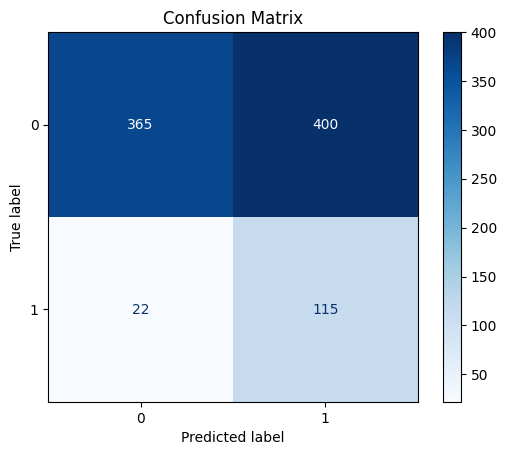

In [143]:
threshold = 0.10

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(train_x, train_y)

y_pred_prob = log_reg.predict_proba(test_x)[:, 1]  

y_pred = (y_pred_prob >= threshold).astype(int)

accuracy = accuracy_score(test_y, y_pred)
recall = recall_score(test_y, y_pred)
precision = precision_score(test_y, y_pred)
f1 = f1_score(test_y, y_pred)
tn, fp, fn, tp = confusion_matrix(test_y, y_pred).ravel()
specificity = tn / (tn + fp)
type_1_error = fp  # False Positive
type_2_error = fn  # False Negative

print(f"Logistic Regression Model with Final Features and Threshold {threshold}:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Type I Error (False Positive): {type_1_error}")
print(f"Type II Error (False Negative): {type_2_error}")

print("\nLogistic Regression Coefficients:")
for feature, coef in zip(final_features, log_reg.coef_[0]):
    print(f"{feature}: {coef:.4f}")

print(f"\nIntercept: {log_reg.intercept_[0]:.4f}")

equation = "Logit(p) = {:.4f}".format(log_reg.intercept_[0])
for feature, coef in zip(final_features, log_reg.coef_[0]):
    equation += " + ({:.4f} * {})".format(coef, feature)
print(f"\nLogistic Regression Equation:")
print(equation)

conf_matrix = confusion_matrix(test_y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


Summary of differences: Train vs. Test outcomes with 0.10 threshold:

## Training vs Test Outcomes for Logistic Regression Model at Threshold 0.10

| Metric                         | Training Data | Test Data  |
|-------------------------------|---------------|------------|
| **Accuracy**                  | 0.4459        | 0.5322     |
| **Precision**                 | 0.1941        | 0.2233     |
| **Recall**                    | 0.9405        | 0.8394     |
| **F1-Score**                  | 0.3218        | 0.3528     |
| **Specificity**               | 0.3656        | 0.4771     |
| **Type I Error (False Positive)** | 328           | 400        |
| **Type II Error (False Negative)** | 5             | 22         |

Accuracy, precision, F1-Score and specificity improved, while recall decreased, # of type I and II errors increased

## Training the Model: Application of Model to Test Data Set

**Using Threshold of 0.48 to prioritize Precision and Specificity**

Logistic Regression Model with Final Features and Threshold 0.48:
Accuracy: 0.8481
Recall: 0.0511
Precision: 0.5000
F1-Score: 0.0927
Specificity: 0.9908
Type I Error (False Positive): 7
Type II Error (False Negative): 130

Logistic Regression Coefficients:
age: 0.5595
cigsPerDay: 0.2603
totChol: 0.1420
sysBP: 0.3773
glucose: 0.2272
sex_code: -0.2511

Intercept: -1.9957

Logistic Regression Equation:
Logit(p) = -1.9957 + (0.5595 * age) + (0.2603 * cigsPerDay) + (0.1420 * totChol) + (0.3773 * sysBP) + (0.2272 * glucose) + (-0.2511 * sex_code)


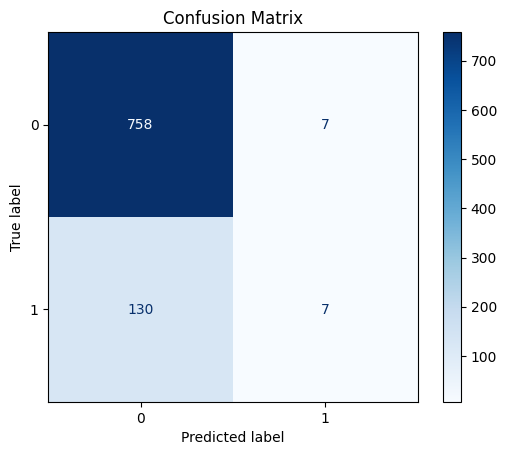

In [145]:
threshold = 0.48

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(train_x, train_y)

y_pred_prob = log_reg.predict_proba(test_x)[:, 1]  

y_pred = (y_pred_prob >= threshold).astype(int)

accuracy = accuracy_score(test_y, y_pred)
recall = recall_score(test_y, y_pred)
precision = precision_score(test_y, y_pred)
f1 = f1_score(test_y, y_pred)
tn, fp, fn, tp = confusion_matrix(test_y, y_pred).ravel()
specificity = tn / (tn + fp)
type_1_error = fp  # False Positive
type_2_error = fn  # False Negative

print(f"Logistic Regression Model with Final Features and Threshold {threshold}:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Type I Error (False Positive): {type_1_error}")
print(f"Type II Error (False Negative): {type_2_error}")

print("\nLogistic Regression Coefficients:")
for feature, coef in zip(final_features, log_reg.coef_[0]):
    print(f"{feature}: {coef:.4f}")

print(f"\nIntercept: {log_reg.intercept_[0]:.4f}")

equation = "Logit(p) = {:.4f}".format(log_reg.intercept_[0])
for feature, coef in zip(final_features, log_reg.coef_[0]):
    equation += " + ({:.4f} * {})".format(coef, feature)
print(f"\nLogistic Regression Equation:")
print(equation)

conf_matrix = confusion_matrix(test_y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


Summary of differences: Train vs. Test outcomes with 0.48 threshold:

| Metric                         | Training Data | Test Data  |
|-------------------------------|---------------|------------|
| **Accuracy**                  | 0.8636        | 0.8481     |
| **Precision**                 | 1.0000        | 0.5000     |
| **Recall**                    | 0.0238        | 0.0511     |
| **F1-Score**                  | 0.0465        | 0.0927     |
| **Specificity**               | 1.0000        | 0.9908     |
| **Type I Error (False Positive)** | 0             | 7          |
| **Type II Error (False Negative)** | 82            | 130        |

Recall and F1-Score showed slight improvement while accuracy, precision, specificity decreased and # of type I and II errors increased

## Attempt to improve model performance with backward feature selection: 0.10 threshold

## Feature Selection

Feature selection is a crucial step in the model building process for the following reasons:

- **Improve Model Performance**: Reducing the number of features can enhance model performance by mitigating overfitting and improving generalization.
- **Reduce Complexity**: Fewer features lead to a simpler model, which is easier to interpret and faster to train.
- **Identify Key Features**: Understanding which features contribute most to the model’s predictions provides valuable insights and helps in focusing on the most influential variables.

Performing feature selection can lead to more efficient and effective models by ensuring that only the most relevant features are used in the final analysis.


In [164]:
threshold = 0.10

train_x_df = pd.DataFrame(train_x, columns=final_features)
test_x_df = pd.DataFrame(test_x, columns=final_features)

train_x_df.index = train_y.index

train_x_const = sm.add_constant(train_x_df)
test_x_const = sm.add_constant(test_x_df)

logit_model = sm.Logit(train_y, train_x_const)
result = logit_model.fit()

def backward_feature_selection(data, target, significance_level=0.05):
    features = data.columns.tolist()
    while len(features) > 0:
        model = sm.Logit(target, sm.add_constant(data[features])).fit(disp=0)
        p_values = model.pvalues[1:]  # Exclude intercept
        max_p_value = p_values.max()
        if max_p_value > significance_level:
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break
    return features

selected_features = backward_feature_selection(train_x_df, train_y)
print(f"Selected features: {selected_features}")

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(train_x_df[selected_features], train_y)

y_pred_prob = log_reg.predict_proba(test_x_df[selected_features])[:, 1]
y_pred = (y_pred_prob >= threshold).astype(int)

accuracy = accuracy_score(test_y, y_pred)
recall = recall_score(test_y, y_pred)
precision = precision_score(test_y, y_pred)
f1 = f1_score(test_y, y_pred)
tn, fp, fn, tp = confusion_matrix(test_y, y_pred).ravel()
specificity = tn / (tn + fp)
type_1_error = fp
type_2_error = fn

print(f"Logistic Regression Model with Selected Features and Threshold {threshold}:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Type I Error (False Positive): {type_1_error}")
print(f"Type II Error (False Negative): {type_2_error}")

print("\nLogistic Regression Coefficients:")
for feature, coef in zip(selected_features, log_reg.coef_[0]):
    print(f"{feature}: {coef:.4f}")

# Print the intercept
print(f"\nIntercept: {log_reg.intercept_[0]:.4f}")

# Print the logistic regression equation
equation = "Logit(p) = {:.4f}".format(log_reg.intercept_[0])
for feature, coef in zip(selected_features, log_reg.coef_[0]):
    equation += " + ({:.4f} * {})".format(coef, feature)
print(f"\nLogistic Regression Equation:")
print(equation)



Optimization terminated successfully.
         Current function value: 0.374963
         Iterations 7
Selected features: ['age', 'cigsPerDay', 'totChol', 'sysBP', 'glucose', 'sex_code']
Logistic Regression Model with Selected Features and Threshold 0.1:
Accuracy: 0.5322
Recall: 0.8394
Precision: 0.2233
F1-Score: 0.3528
Specificity: 0.4771
Type I Error (False Positive): 400
Type II Error (False Negative): 22

Logistic Regression Coefficients:
age: 0.5595
cigsPerDay: 0.2603
totChol: 0.1420
sysBP: 0.3773
glucose: 0.2272
sex_code: -0.2511

Intercept: -1.9957

Logistic Regression Equation:
Logit(p) = -1.9957 + (0.5595 * age) + (0.2603 * cigsPerDay) + (0.1420 * totChol) + (0.3773 * sysBP) + (0.2272 * glucose) + (-0.2511 * sex_code)


## Performance Metrics Comparison

| Metric                         | Training Data | Initial Test Metrics | Test Metrics After Backward Feature Selection |
|-------------------------------|---------------|----------------------|---------------------------------------------|
| **Accuracy**                  | 0.445923      | 0.5322               | 0.5322                                      |
| **Precision**                 | 0.194103      | 0.2233               | 0.2233                                      |
| **Recall**                    | 0.940476      | 0.8394               | 0.8394                                      |
| **F1-Score**                  | 0.321792      | 0.3528               | 0.3528                                      |
| **Specificity**               | 0.365571      | 0.4771               | 0.4771                                      |
| **Type I Error (False Positive)** | 328         | 400                  | 400                                         |
| **Type II Error (False Negative)** | 5           | 22                   | 22                                          |

## Logistic Regression Coefficients

| Feature        | Initial Test Metrics | Test Metrics After Backward Feature Selection |
|----------------|----------------------|---------------------------------------------|
| age            | 0.5595               | 0.5595                                      |
| cigsPerDay     | 0.2603               | 0.2603                                      |
| totChol        | 0.1420               | 0.1420                                      |
| sysBP          | 0.3773               | 0.3773                                      |
| glucose        | 0.2272               | 0.2272                                      |
| sex_code       | -0.2511              | -0.2511                                     |
| **Intercept**  | -1.9957              | -1.9957                                     |

## Logistic Regression Equation

### Initial Test Metrics:
Logit(p) = -1.9957 + (0.5595 * age) + (0.2603 * cigsPerDay) + (0.1420 * totChol) + (0.3773 * sysBP) + (0.2272 * glucose) + (-0.2511 * sex_code)

### Test Metrics After Backward Feature Selection:
Logit(p) = -1.9957 + (0.5595 * age) + (0.2603 * cigsPerDay) + (0.1420 * totChol) + (0.3773 * sysBP) + (0.2272 * glucose) + (-0.2511 * sex_code)


**Insights**

The backward feature selection process did not eliminate any features and retained all 6 features. The resulting coefficients and intercept did not change, suggesting that all the features initially selected are statistically significant at the chosen significance level. 

**Implications:**

All selected features are statistically significant, meaning they each contribute to the model in a meaningful way.

The backward feature selection did not find any features that could be removed without degrading the model’s performance, indicating no redundancy among the selected features.

## Improve code with recursive feature elimination with cross-validation (RFECV)

RFE is a wrapper-type feature selection method that recursively removes the least important features and builds a model on the remaining features to identify which combination of features contribute the most to the model performance.

RFECV is an extension of RFE that uses cross-validation to find the optimal number of features.

This includes forward selection, backward elimination, or a combination of both (stepwise selection).

Optimal number of features: 5
Selected features: Index(['age', 'cigsPerDay', 'sysBP', 'glucose', 'sex_code'], dtype='object')


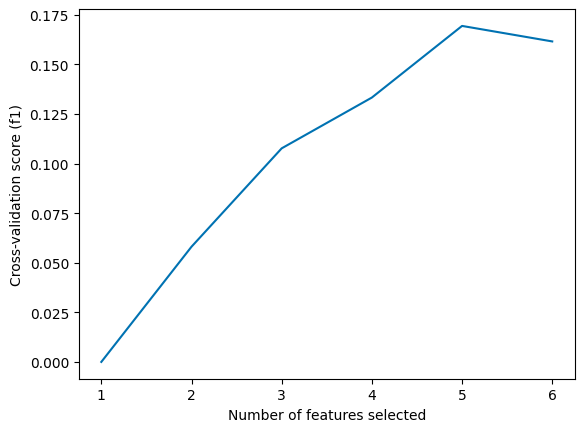

Logistic Regression Model with Selected Features and Threshold 0.1:
Accuracy: 0.5310
Recall: 0.8467
Precision: 0.2239
F1-Score: 0.3542
Specificity: 0.4745
Type I Error (False Positive): 402
Type II Error (False Negative): 21

Logistic Regression Coefficients:
age: 0.5735
cigsPerDay: 0.2652
sysBP: 0.3890
glucose: 0.2274
sex_code: -0.2318

Intercept: -1.9806

Logistic Regression Equation:
Logit(p) = -1.9806 + (0.5735 * age) + (0.2652 * cigsPerDay) + (0.3890 * sysBP) + (0.2274 * glucose) + (-0.2318 * sex_code)


In [184]:
threshold = 0.10

log_reg = LogisticRegression(max_iter=1000)

rfecv = RFECV(estimator=log_reg, step=1, cv=StratifiedKFold(5), scoring='f1')

rfecv.fit(train_x_df, train_y)

print(f"Optimal number of features: {rfecv.n_features_}")
print(f"Selected features: {train_x_df.columns[rfecv.support_]}")

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (f1)")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()

selected_features = train_x_df.columns[rfecv.support_]
log_reg.fit(train_x_df[selected_features], train_y)

y_pred_prob = log_reg.predict_proba(test_x_df[selected_features])[:, 1]
y_pred = (y_pred_prob >= threshold).astype(int)

accuracy = accuracy_score(test_y, y_pred)
recall = recall_score(test_y, y_pred)
precision = precision_score(test_y, y_pred)
f1 = f1_score(test_y, y_pred)
tn, fp, fn, tp = confusion_matrix(test_y, y_pred).ravel()
specificity = tn / (tn + fp)
type_1_error = fp
type_2_error = fn

print(f"Logistic Regression Model with Selected Features and Threshold {threshold}:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Type I Error (False Positive): {type_1_error}")
print(f"Type II Error (False Negative): {type_2_error}")

print("\nLogistic Regression Coefficients:")
for feature, coef in zip(selected_features, log_reg.coef_[0]):
    print(f"{feature}: {coef:.4f}")

print(f"\nIntercept: {log_reg.intercept_[0]:.4f}")

equation = "Logit(p) = {:.4f}".format(log_reg.intercept_[0])
for feature, coef in zip(selected_features, log_reg.coef_[0]):
    equation += " + ({:.4f} * {})".format(coef, feature)
print(f"\nLogistic Regression Equation:")
print(equation)


## Performance Metrics Comparison

| Metric                         | Initial Test Metrics | Test Metrics After RFECV |
|-------------------------------|----------------------|-------------------------|
| **Accuracy**                  | 0.5322               | 0.5310                  |
| **Precision**                 | 0.2233               | 0.2239                  |
| **Recall**                    | 0.8394               | 0.8467                  |
| **F1-Score**                  | 0.3528               | 0.3542                  |
| **Specificity**               | 0.4771               | 0.4745                  |
| **Type I Error (False Positive)** | 400              | 402                     |
| **Type II Error (False Negative)** | 22              | 21                      |

## Logistic Regression Coefficients

| Feature        | Initial Test Metrics | Test Metrics After RFECV |
|----------------|----------------------|-------------------------|
| age            | 0.5595               | 0.5735                  |
| cigsPerDay     | 0.2603               | 0.2652                  |
| totChol        | 0.1420               | (Removed)               |
| sysBP          | 0.3773               | 0.3890                  |
| glucose        | 0.2272               | 0.2274                  |
| sex_code       | -0.2511              | -0.2318                 |
| **Intercept**  | -1.9957              | -1.9806                 |

## Logistic Regression Equation

### Initial Test Metrics:
Logit(p) = -1.9957 + (0.5595 * age) + (0.2603 * cigsPerDay) + (0.1420 * totChol) + (0.3773 * sysBP) + (0.2272 * glucose) + (-0.2511 * sex_code)

### Test Metrics After RFECV:
Logit(p) = -1.9806 + (0.5735 * age) + (0.2652 * cigsPerDay) + (0.3890 * sysBP) + (0.2274 * glucose) + (-0.2318 * sex_code)


## Conclusion:
The performance metrics indicate that the model with RFECV is slightly better at identifying true positive cases (higher recall) and has a marginally better balance between precision and recall (higher F1-score). The increase in false positives is relatively small and might be acceptable depending on the specific application and the cost of false positives versus false negatives.

Given the context of predicting coronary heart disease, minimizing false negatives is usually more critical to avoid missing potential cases that need medical attention. Therefore, the slight improvement in recall and reduction in false negatives could be seen as beneficial, even if it comes with a small increase in false positives.

Optimal number of features: 5
Selected features: Index(['age', 'cigsPerDay', 'sysBP', 'glucose', 'sex_code'], dtype='object')


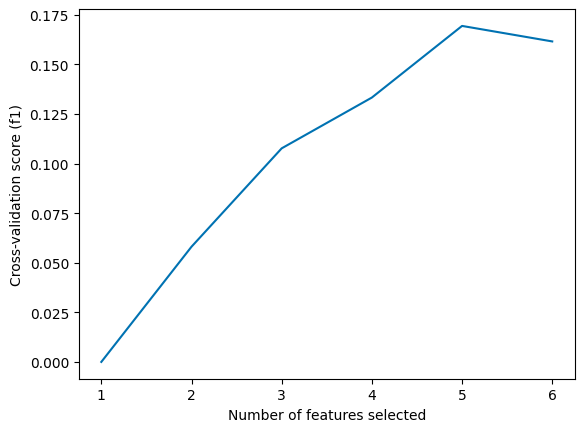

Logistic Regression Model with Selected Features and Threshold 0.48:
Accuracy: 0.8448
Recall: 0.0438
Precision: 0.4000
F1-Score: 0.0789
Specificity: 0.9882
Type I Error (False Positive): 9
Type II Error (False Negative): 131

Logistic Regression Coefficients:
age: 0.5735
cigsPerDay: 0.2652
sysBP: 0.3890
glucose: 0.2274
sex_code: -0.2318

Intercept: -1.9806

Logistic Regression Equation:
Logit(p) = -1.9806 + (0.5735 * age) + (0.2652 * cigsPerDay) + (0.3890 * sysBP) + (0.2274 * glucose) + (-0.2318 * sex_code)


In [186]:
threshold = 0.48

log_reg = LogisticRegression(max_iter=1000)

rfecv = RFECV(estimator=log_reg, step=1, cv=StratifiedKFold(5), scoring='f1')

rfecv.fit(train_x_df, train_y)

print(f"Optimal number of features: {rfecv.n_features_}")
print(f"Selected features: {train_x_df.columns[rfecv.support_]}")

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (f1)")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()

selected_features = train_x_df.columns[rfecv.support_]
log_reg.fit(train_x_df[selected_features], train_y)

y_pred_prob = log_reg.predict_proba(test_x_df[selected_features])[:, 1]
y_pred = (y_pred_prob >= threshold).astype(int)

accuracy = accuracy_score(test_y, y_pred)
recall = recall_score(test_y, y_pred)
precision = precision_score(test_y, y_pred)
f1 = f1_score(test_y, y_pred)
tn, fp, fn, tp = confusion_matrix(test_y, y_pred).ravel()
specificity = tn / (tn + fp)
type_1_error = fp
type_2_error = fn

print(f"Logistic Regression Model with Selected Features and Threshold {threshold}:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Type I Error (False Positive): {type_1_error}")
print(f"Type II Error (False Negative): {type_2_error}")

print("\nLogistic Regression Coefficients:")
for feature, coef in zip(selected_features, log_reg.coef_[0]):
    print(f"{feature}: {coef:.4f}")

print(f"\nIntercept: {log_reg.intercept_[0]:.4f}")

equation = "Logit(p) = {:.4f}".format(log_reg.intercept_[0])
for feature, coef in zip(selected_features, log_reg.coef_[0]):
    equation += " + ({:.4f} * {})".format(coef, feature)
print(f"\nLogistic Regression Equation:")
print(equation)


## Performance Metrics Comparison for Threshold 0.48

| Metric                         | Initial Test Metrics | Test Metrics After RFECV |
|-------------------------------|----------------------|-------------------------|
| **Accuracy**                  | 0.8481               | 0.8448                  |
| **Recall**                    | 0.0511               | 0.0438                  |
| **Precision**                 | 0.5000               | 0.4000                  |
| **F1-Score**                  | 0.0927               | 0.0789                  |
| **Specificity**               | 0.9908               | 0.9882                  |
| **Type I Error (False Positive)** | 7                | 9                       |
| **Type II Error (False Negative)** | 130              | 131                     |

## Logistic Regression Coefficients for Threshold 0.48

| Feature        | Initial Test Metrics | Test Metrics After RFECV |
|----------------|----------------------|-------------------------|
| age            | 0.5595               | 0.5735                  |
| cigsPerDay     | 0.2603               | 0.2652                  |
| totChol        | 0.1420               | (Removed)               |
| sysBP          | 0.3773               | 0.3890                  |
| glucose        | 0.2272               | 0.2274                  |
| sex_code       | -0.2511              | -0.2318                 |
| **Intercept**  | -1.9957              | -1.9806                 |

## Logistic Regression Equation for Threshold 0.48

### Initial Test Metrics:
Logit(p) = -1.9957 + (0.5595 * age) + (0.2603 * cigsPerDay) + (0.1420 * totChol) + (0.3773 * sysBP) + (0.2272 * glucose) + (-0.2511 * sex_code)

### Test Metrics After RFECV:
Logit(p) = -1.9806 + (0.5735 * age) + (0.2652 * cigsPerDay) + (0.3890 * sysBP) + (0.2274 * glucose) + (-0.2318 * sex_code)


## Conclusion

The RFECV did not significantly improve the model metrics at the 0.48 threshold. In fact, some metrics slightly worsened.
The removal of the totChol feature did not lead to better performance in this case.
The initial model with all features might be preferred if the metrics are the primary concern.

Considerations:

### Threshold Sensitivity:
- The threshold determines the decision boundary for classifying a prediction as positive or negative.
- **Lower Thresholds (e.g., 0.10):** More lenient, classifying more cases as positive.
- **Higher Thresholds (e.g., 0.48):** Stricter, classifying fewer cases as positive.

### Effect of Feature Selection:
- The impact of removing features might be more beneficial at certain thresholds where the decision boundary is more finely tuned to the available data.
  - **Lower Threshold:** The model might benefit from reducing noise by removing less significant features.
  - **Higher Threshold:** The model might already be more precise due to the stricter decision boundary, and removing features could remove essential information, leading to worse performance.

### Model Complexity and Overfitting:
- **Lower Threshold:** The model might be more prone to overfitting, and feature selection helps by reducing complexity and overfitting.
- **Higher Threshold:** The model might already be simpler due to the strict classification boundary, and further feature reduction might lead to underfitting.



# **<span style="color:blue">5. Conclusion: Final Recommendations: Use of 2 Models for Confirmatory Screening via Two-Step Screening Process:</span>**

## Initial Broad Screening Test:
- Use a test with high recall/sensitivity (threshold at 0.10) to catch as many potential cases as possible, minimizing false negatives.

### **Model Equation for Screening #1**:
**<span style="color:blue">Logit(p) = -1.9806 + (0.5735 * age) + (0.2652 * cigsPerDay) + (0.3890 * sysBP) + (0.2274 * glucose) + (-0.2318 * sex_code)</span>**

## Subsequent Highly Specific Test:
- Use a model with a higher threshold (0.48) to identify those who actually do not have risk, minimizing false positives from the initial screening.

### **Model Equation for Screening #2**:
**<span style="color:blue">Logit(p) = -1.9957 + (0.5595 * age) + (0.2603 * cigsPerDay) + (0.1420 * totChol) + (0.3773 * sysBP) + (0.2272 * glucose) + (-0.2511 * sex_code)</span>**


# Reconciliation of Specificity and Sensitivity in Medical Context

If the goal is to minimize the number of cases where someone who has heart disease is missed by the model (i.e., to minimize false negatives), then recall (or sensitivity) should be prioritized. 
However, in the medical field, high specificity is often counter-intuitively used to rule in conditions. The conventional wisdom is that  because a test with high specificity is very good at correctly identifying those without a condition, a positive test can be trusted to be true.  Given the relatively small data set provided for this modeling task, using the two step screening process should help provide the most accurate possible results given the relative weaknesses of both models.

## Recommendations for Model Improvement

### Increasing Sample Size / Data Set
- **Larger Sample Size**: One of the most straightforward ways to improve the model is to increase the sample size. A larger dataset can help the model learn more patterns and generalize better to unseen data.
  - **Benefit**: Reduces the variance and helps in better estimation of the model parameters, thus improving both recall and specificity.
  - **Action**: Collect more data from diverse sources, ensuring it is representative of the population to be modeled.

### Feature Engineering
- **Additional Features**: Introducing new features or improving existing ones can help the model capture more relevant information.
  - **Benefit**: Better features can improve the model's predictive power and accuracy.
  - **Action**: Consider domain-specific features, such as additional lifestyle factors or other medical tests.



In [198]:
import subprocess

notebook_file = "/Users/virginiaarnette/Cardiovascular_Log_Regression.ipynb"

subprocess.call(["black", notebook_file])

reformatted /Users/virginiaarnette/Cardiovascular_Log_Regression.ipynb

All done! ✨ 🍰 ✨
1 file reformatted.


0